# Exploring Census vs. DOC Population Count Discrepancies

##### Overview

To avoid [prison gerrymandering](https://www.brennancenter.org/our-work/research-reports/prison-gerrymandering-undermines-our-democracy), ten states (CA, CO, CT, DE, MD, NJ, NV, NY, VA, WA) adjusted the 2020 U.S. Census data to reallocate incarcerated populations at addresses prior to incarceration according to their respective state laws. Pennsylvania's redistricting committee and seemingly Montana's Districting and Apportionment Commission likewise chose to do this process for their states even though it's not enshrined in law.

This notebook looks at the differences between the original [U.S. Census PL 94-171](https://www.census.gov/programs-surveys/decennial-census/about/rdo/summary-files.html#:~:text=Public%20Law%20(P.L.),order%20to%20conduct%20legislative%20redistricting.)  population numbers to states' Department of Corrections' population count in these twelve states except Montana (their adjusted data does not seem to be publicly available at the moment).

Source: The data being imported is primarily from the U.S. Census and independent state commitees and legislatures aggregated by the [Redistricting Hub API](https://redistrictingdatahub.org/).  Secondary sources include documents from various states government agencies.

### The Initial Find — NY Legislative Task Force on Demographic Research and Reapportionment

Two paragraphs in the NY LATFOR's README file initially inspired me to look more closely at the adjusted populations of incarderated facilities. 

The statements (see below) highlighted two clear issues:

1. Zero Populations:  There are census blocks seemingly counted as having zero populations where there were people that should have been counted at the time.

2. The Department of Corrections' population count was significantly higher in some instances that the U.S. Census count, which becomes very clear when the adjusted population becomes negative. 

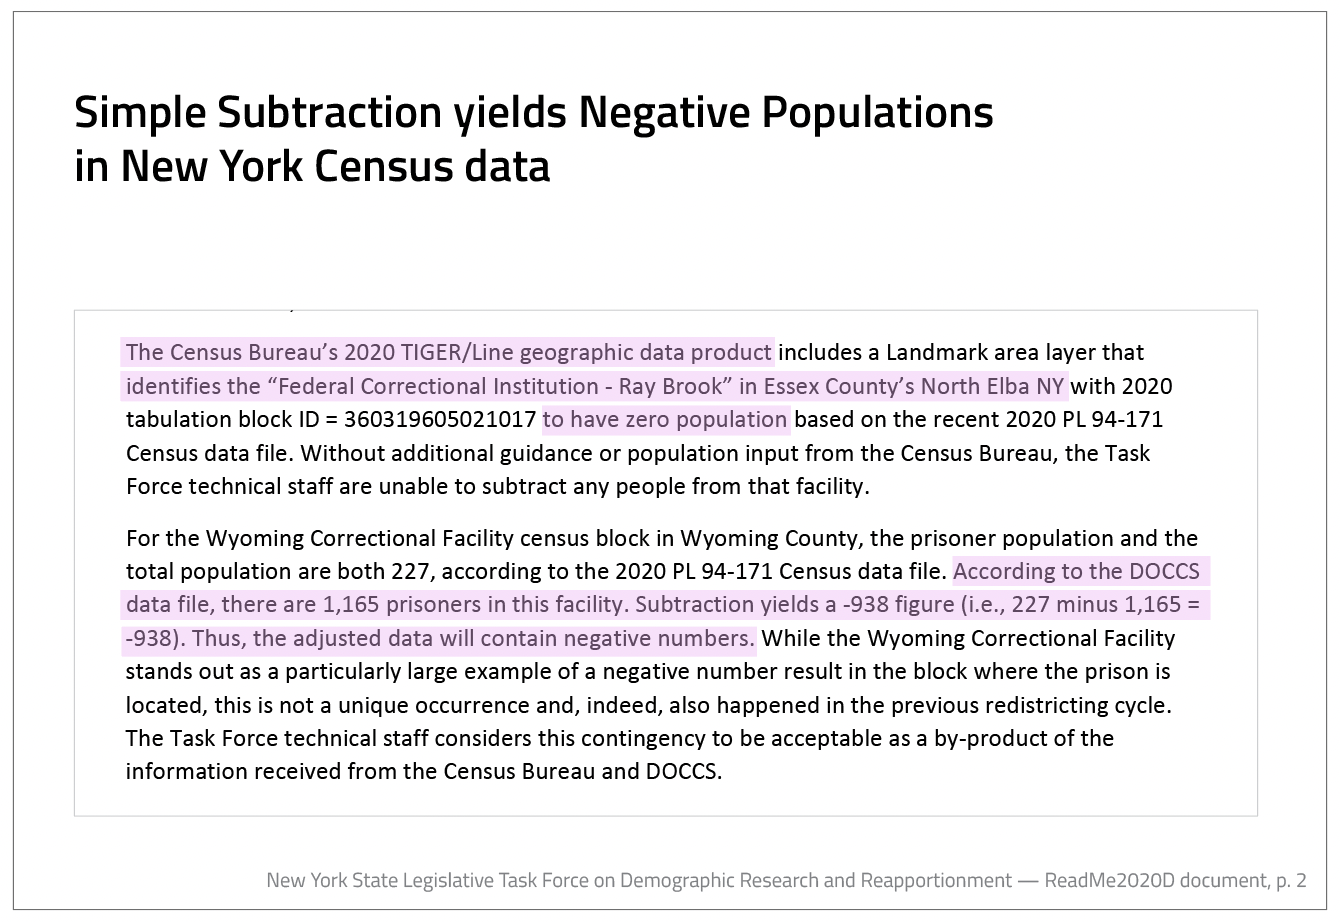

This initial find led me to look into each state that adjusts their population for prisoner allocation.

### Guiding Questions

Guiding Questions: Why are there gaps between the U.S. Census and DOC population counts for incarcerated facilities? How pervasive is this issue?

Questions to Answer:
* How often do these gaps occur?
* How large are the discrepancies between the Census and DOC Numbers?
* Where is the breakdown in process?
* Are there specific facility types that more often have these issues such as the size, location, demographics of a facility? 
* What is the effect?

-----

##### Imports

In [1]:
# Necessary imports
import pandas as pd
from plotnine import *

# I don't think we use these?
from mizani.breaks import date_breaks
from mizani.formatters import date_format

/Users/sm/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [194]:
%%R

# My commonly used R imports

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
require('explore')
require('tidyr')
require('forcats')
require('knitr')
require('ragg')
require('palmerpenguins')
# require('theme538')

R[write to console]: Loading required package: ragg



In [5]:
df = pd.DataFrame(
    np.random.randint(0,100,size=(100, 2)), columns=list('AB'))
df.head()

A   B
0  64  27
1  86   5
2  66  64
3   6  92
4  70  15

In [6]:
# %%R -i df

# # EXAMPLE R CELL
# df
# plt <- ggplot(df) +
#     geom_point(aes(A,B))

# plt

In [7]:
pd.set_option("display.max_columns", None)

### Importing Merged CSVs from Output of Census Chaos notebook

In [8]:
# df_pa4.to_csv('..//data//processed//merged//output_pa_merged.csv', index = False)

California

In [9]:
df_ca = pd.read_csv("..//data//processed//merged//output_ca_merged.csv", encoding="utf-8")
df_ca.head(3)

BLOCK20  COUNTY   TRACT  BLOCK  P0020001  Population P2  P0030001  \
0  60014001001000       1  400100   1000         0              0         0   
1  60014001001001       1  400100   1001         0              0         0   
2  60014001001002       1  400100   1002         0              0         0   

   18+_Population P4  P0050003  GQ_Inst_CFAdult  P0050004  GQ_Inst_Juvenile  \
0                  0         0                0         0                 0   
1                  0         0                0         0                 0   
2                  0         0                0         0                 0   

   AREALAND        NAME   INTPTLAT    INTPTLON  dif_pop  adjpop  
0     51124  Block 1000  37.880348 -122.228550        0       0  
1    695414  Block 1001  37.879219 -122.228772        0       0  
2      9330  Block 1002  37.882910 -122.238471        0       0

Colorado

In [10]:
df_co = pd.read_csv("..//data//processed//merged//output_co_merged.csv", encoding="utf-8")
df_co.head(3)

FILEID STUSAB         GEOCODE  COUNTY  TRACT  BLKGRP  BLOCK  AREALAND  \
0   PLST     CO  80010078011000       1   7801       1   1000     20912   
1   PLST     CO  80010078011001       1   7801       1   1001     20185   
2   PLST     CO  80010078011002       1   7801       1   1002     20340   

         NAME   INTPTLAT    INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  39.742879 -104.866410       120       120        82         0   
1  Block 1001  39.742879 -104.867597       156       156       120         0   
2  Block 1002  39.742880 -104.868770       234       234       177         0   

   P0050003  P0050004         GEOID20 county_name  TOTALPOP_ADJ  dif_pop  \
0         0         0  80010078011000       Adams           123        3   
1         0         0  80010078011001       Adams           156        0   
2         0         0  80010078011002       Adams           238        4   

   adjpop  
0     123  
1     156  
2     238

Connecticut

In [11]:
df_ct = pd.read_csv("..//data//processed//merged//output_ct_merged.csv", encoding="utf-8")
df_ct.head(3)

FILEID STUSAB         GEOCODE  COUNTY  TRACT  BLKGRP  BLOCK  AREALAND  \
0   PLST     CT  90010101011000       1  10101       1   1000    123621   
1   PLST     CT  90010101011001       1  10101       1   1001   2032541   
2   PLST     CT  90010101011002       1  10101       1   1002   1227724   

         NAME   INTPTLAT   INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  41.125774 -73.671811        27        27        23         0   
1  Block 1001  41.115624 -73.674234       198       198       149         0   
2  Block 1002  41.108930 -73.686944        18        18        12         0   

   P0050003  P0050004       Town         GEOID20  P0030001 - Original  \
0         0         0  Greenwich  90010101011000                   23   
1         0         0  Greenwich  90010101011001                  149   
2         0         0  Greenwich  90010101011002                   12   

   P0030001 - Adjusted  P0030001 - Difference  \
0                   23                      0   
1                  149                      0   
2                   13                      1   

                                            Geometry  dif_cf  adjpop  
0  MULTIPOLYGON (((-73.676417 41.124666999999995,...       0      23  
1  MULTIPOLYGON (((-73.68428999999999 41.110071, ...       0     149  
2  MULTIPOLYGON (((-73.693623 41.10838, -73.69349...       1      13

Delaware

In [12]:
df_de = pd.read_csv("..//data//processed//merged//output_de_merged.csv", encoding="utf-8")
df_de.head(3)

FILEID STUSAB          GEOCODE  COUNTY  TRACT  BLKGRP  BLOCK  AREALAND  \
0   PLST     DE  100010401001000       1  40100       1   1000    748145   
1   PLST     DE  100010401001001       1  40100       1   1001   1002562   
2   PLST     DE  100010401001002       1  40100       1   1002   3607081   

         NAME   INTPTLAT   INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  39.234945 -75.641135       108       108        83         0   
1  Block 1001  39.231143 -75.653046        44        44        33         0   
2  Block 1002  39.239786 -75.667161        74        74        58         0   

   P0050003  P0050004  State  Proposed 2022_SD  County        Tract  \
0         0         0     10                15   10001  10001040100   
1         0         0     10                15   10001  10001040100   
2         0         0     10                15   10001  10001040100   

     BlockGroup            Block  Adj_Population  dif_pop  adjpop  
0  100010401001  100010401001000             109        1     109  
1  100010401001  100010401001001              44        0      44  
2  100010401001  100010401001002              74        0      74

Maryland

In [13]:
df_md = pd.read_csv("..//data//processed//merged//output_md_merged.csv", encoding="utf-8")
df_md.head(3)

FILEID STUSAB          GEOCODE  COUNTY  TRACT  BLKGRP  BLOCK  AREALAND  \
0   PLST     MD  240010001001000       1    100       1   1000   3090730   
1   PLST     MD  240010001001001       1    100       1   1001    225351   
2   PLST     MD  240010001001002       1    100       1   1002      5453   

         NAME   INTPTLAT   INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  39.713167 -78.345207        31        31        27         0   
1  Block 1001  39.708005 -78.354779         4         4         2         0   
2  Block 1002  39.710110 -78.352735         4         4         4         0   

   P0050003  P0050004            Block    BlockGroup        Tract  County  \
0         0         0  240010001001000  240010001001  24001000100   24001   
1         0         0  240010001001001  240010001001  24001000100   24001   
2         0         0  240010001001002  240010001001  24001000100   24001   

   State          VTD  Adj_Population  dif_pop  adjpop  
0     24  2400101-000              31        0      31  
1     24  2400101-000               4        0       4  
2     24  2400101-000               4        0       4

New Jersey

In [14]:
df_nj = pd.read_csv("..//data//processed//merged//output_nj_merged.csv", encoding="utf-8")
df_nj.head(3)

FILEID STUSAB          GEOCODE  COUNTY  TRACT  BLKGRP  BLOCK  AREALAND  \
0   PLST     NJ  340010001001000       1    100       1   1000         0   
1   PLST     NJ  340010001001001       1    100       1   1001    552994   
2   PLST     NJ  340010001001002       1    100       1   1002      9154   

         NAME   INTPTLAT   INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  39.362701 -74.456205         0         0         0         0   
1  Block 1001  39.359901 -74.457522         0         0         0         0   
2  Block 1002  39.359479 -74.461735        27        27        17         0   

   P0050003  P0050004  STATE  order  State  County  Municipality  Tract  \
0         0         0     34      0     34       1          2080    100   
1         0         0     34      1     34       1          2080    100   
2         0         0     34      2     34       1          2080    100   

   Group  Block     VTD VTDI      County Name   Municipality Name    Areaname  \
0      1   1000  010501    A  Atlantic County  Atlantic City city  Block 1000   
1      1   1001  010501    A  Atlantic County  Atlantic City city  Block 1001   
2      1   1002  010501    A  Atlantic County  Atlantic City city  Block 1002   

   Population  Total  18plus  dif_pop  adjpop  
0           0      0       0        0       0  
1           0      0       0        0       0  
2          27     22      17        0      27

Nevada

In [15]:
df_nv = pd.read_csv("..//data//processed//merged//output_nv_merged.csv", encoding="utf-8")
df_nv.head(3)

FILEID STUSAB          GEOCODE  COUNTY   TRACT  BLKGRP  BLOCK   AREALAND  \
0   PLST     NV  320019501001000       1  950100       1   1000  189454886   
1   PLST     NV  320019501001001       1  950100       1   1001   61766429   
2   PLST     NV  320019501001002       1  950100       1   1002   40086131   

         NAME   INTPTLAT    INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  39.950029 -117.596185         0         0         0         0   
1  Block 1001  39.948144 -117.748221         0         0         0         0   
2  Block 1002  39.970603 -117.811940         0         0         0         0   

   P0050003  P0050004  STATEFP20  COUNTYFP20  TRACTCE20  BLOCKCE20  \
0         0         0         32           1     950100       1000   
1         0         0         32           1     950100       1001   
2         0         0         32           1     950100       1002   

           GEOID20                     GEOID  ADJPOP  dif_pop  adjpop  
0  320019501001000  7500000US320019501001000       0        0       0  
1  320019501001001  7500000US320019501001001       0        0       0  
2  320019501001002  7500000US320019501001002       0        0       0

New York

In [16]:
df_ny = pd.read_csv("..//data//processed//merged//output_ny_merged.csv", encoding="utf-8")
df_ny.head(3)

FILEID STUSAB          GEOCODE  COUNTY  TRACT  BLKGRP  BLOCK  AREALAND  \
0   PLST     NY  360010001001000       1    100       1   1000         0   
1   PLST     NY  360010001001001       1    100       1   1001    235406   
2   PLST     NY  360010001001002       1    100       1   1002     13435   

         NAME   INTPTLAT   INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  42.669248 -73.726504         0         0         0         0   
1  Block 1001  42.669632 -73.728619         0         0         0         0   
2  Block 1002  42.670783 -73.729514         0         0         0         0   

   P0050003  P0050004  State  County CNTY_NAME  Tract  Block            BLKID  \
0         0         0     36       1    Albany    100   1000  360010001001000   
1         0         0     36       1    Albany    100   1001  360010001001001   
2         0         0     36       1    Albany    100   1002  360010001001002   

    MCD     MCD_NAME  VTD  ADJPOP  dif_pop  adjpop  
0  1000  Albany city   33       0        0       0  
1  1000  Albany city   33       0        0       0  
2  1000  Albany city   33       0        0       0

Virginia

In [17]:
df_va = pd.read_csv("..//data//processed//merged//output_va_merged.csv", encoding="utf-8")
df_va.head(3)

FILEID STUSAB          GEOCODE  COUNTY  TRACT  BLKGRP  BLOCK  AREALAND  \
0   PLST     VA  510010901011000       1  90101       1   1000    219012   
1   PLST     VA  510010901011001       1  90101       1   1001    221888   
2   PLST     VA  510010901011002       1  90101       1   1002       203   

         NAME   INTPTLAT   INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  37.948163 -75.368287         0         0         0         0   
1  Block 1001  37.952655 -75.351859        19        19        15         0   
2  Block 1002  37.945171 -75.364397         0         0         0         0   

   P0050003  P0050004     fid          GEOID20      NAME20  TAPERSONS  \
0         0         0  130456  510010901011000  Block 1000          0   
1         0         0   11581  510010901011001  Block 1001         19   
2         0         0  147640  510010901011002  Block 1002          0   

   PRADJPOPD  ADJPOP  dif_pop  adjpop  
0          0       0        0       0  
1          0      19        0      19  
2          0       0        0       0

Washington

In [18]:
df_wa = pd.read_csv("..//data//processed//merged//output_wa_merged.csv", encoding="utf-8")
df_wa.head(3)

FILEID STUSAB          GEOCODE  COUNTY   TRACT  BLKGRP  BLOCK   AREALAND  \
0   PLST     WA  530019501001000       1  950100       1   1000  126940523   
1   PLST     WA  530019501001001       1  950100       1   1001     371748   
2   PLST     WA  530019501001002       1  950100       1   1002    2445833   

         NAME   INTPTLAT    INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  47.198731 -118.099119        11        11         7         0   
1  Block 1001  47.219313 -118.017245         0         0         0         0   
2  Block 1002  47.234578 -118.096781         0         0         0         0   

   P0050003  P0050004          GEOID20  TotalPop  GQPop  UTotalPop  UGQPop  \
0         0         0  530019501001000        11      0         11       0   
1         0         0  530019501001001         0      0          0       0   
2         0         0  530019501001002         0      0          0       0   

  Adjusted OrigFacBlk DestBlk PreSubtrct PreAdd  dif_pop  adjpop  
0      NaN        NaN     NaN        NaN    NaN        0      11  
1      NaN        NaN     NaN        NaN    NaN        0       0  
2      NaN        NaN     NaN        NaN    NaN        0       0

Pennsylvania

In [19]:
df_pa = pd.read_csv("..//data//processed//merged//output_pa_merged.csv", encoding="utf-8")
df_pa.head(3)

STFID  COUNTY_x  CBT_x  CD_x  SD_x MUNICIPALITY_x  MCD_x  FIPS_x  \
0  420010010         1      6    13    33    ABBOTTSTOWN      5       1   
1  420010020         1      6    13    33   ARENDTSVILLE     10       1   
2  420010030         1      6    13    33   BENDERSVILLE     15       1   

   FIPS_MCD_x VTD_x PL_VTD_x  P0010001_x  P0030001_x  COUNTY_y  CBT_y  CD_y  \
0         116  0010       10        1022         744         1      6    13   
1        2928  0020       20         867         634         1      6    13   
2        5536  0030       30         736         519         1      6    13   

   SD_y MUNICIPALITY_y  MCD_y  FIPS_y  FIPS_MCD_y VTD_y PL_VTD_y  P0010001_y  \
0    33    ABBOTTSTOWN      5       1         116  0010       10        1025   
1    33   ARENDTSVILLE     10       1        2928  0020       20         870   
2    33   BENDERSVILLE     15       1        5536  0030       30         737   

   P0030001_y  dif_pop  adjpop  
0         747        3    1025  
1         637        3     870  
2         520        1     737

----

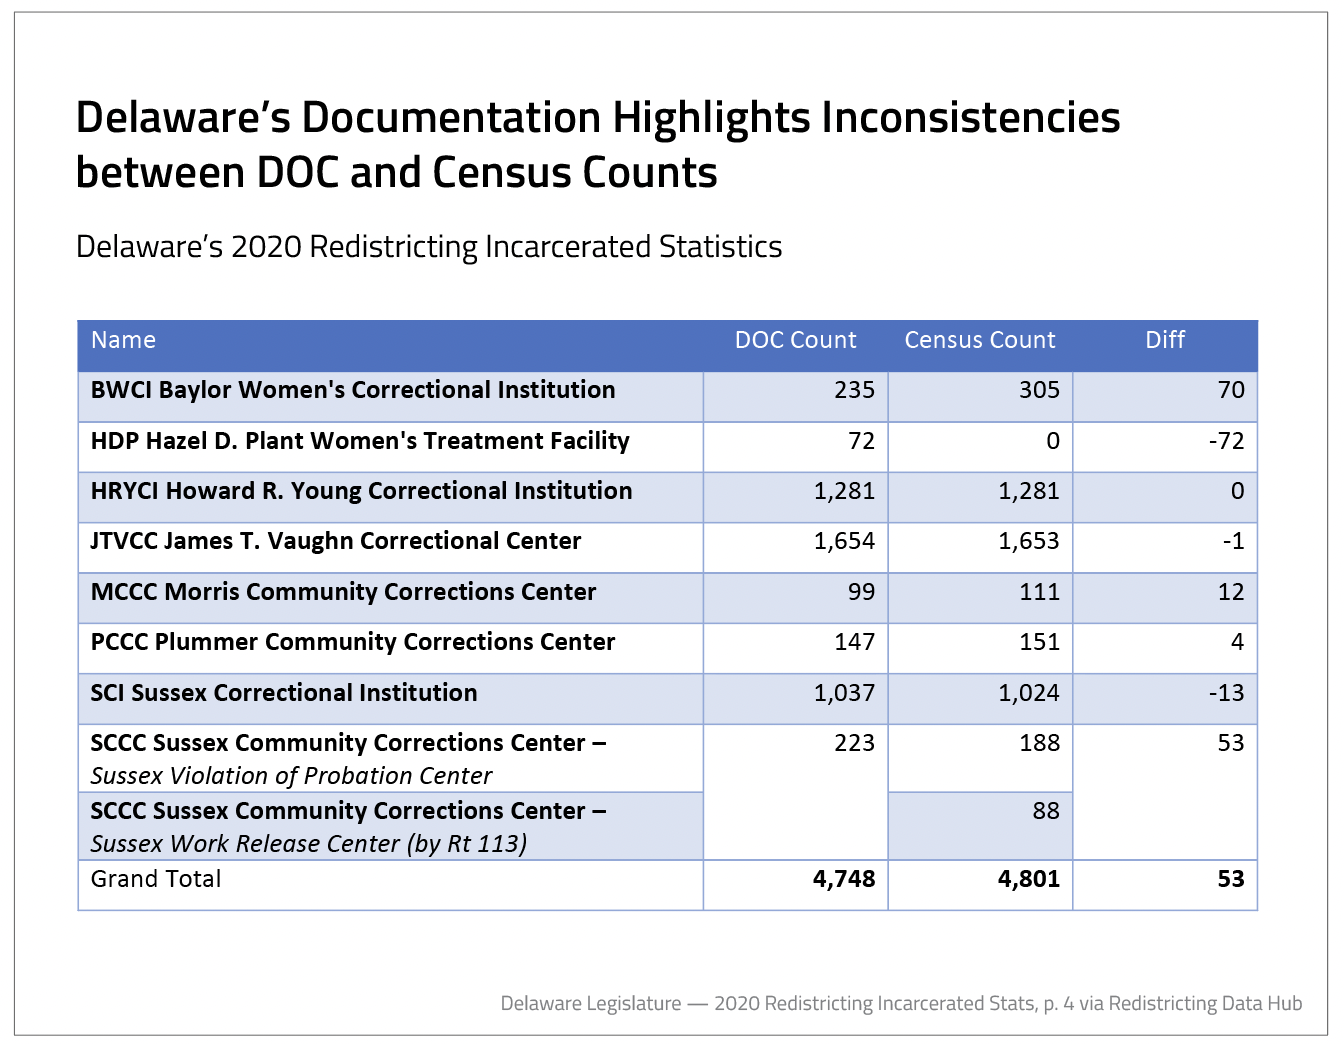 

# Delaware

Text
* Has Zero Populations
* Does not have Negative Adjusted Populations

In [31]:
df_de.head(3)

FILEID STUSAB          GEOCODE  COUNTY  TRACT  BLKGRP  BLOCK  AREALAND  \
0   PLST     DE  100010401001000       1  40100       1   1000    748145   
1   PLST     DE  100010401001001       1  40100       1   1001   1002562   
2   PLST     DE  100010401001002       1  40100       1   1002   3607081   

         NAME   INTPTLAT   INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  39.234945 -75.641135       108       108        83         0   
1  Block 1001  39.231143 -75.653046        44        44        33         0   
2  Block 1002  39.239786 -75.667161        74        74        58         0   

   P0050003  P0050004  State  Proposed 2022_SD  County        Tract  \
0         0         0     10                15   10001  10001040100   
1         0         0     10                15   10001  10001040100   
2         0         0     10                15   10001  10001040100   

     BlockGroup            Block  Adj_Population  dif_pop  adjpop  
0  100010401001  100010401001000             109        1     109  
1  100010401001  100010401001001              44        0      44  
2  100010401001  100010401001002              74        0      74

##### Importing Table copied from README file with DOC count — Delaware General Assembly, Caliper Corporation

Sources: DEPrisonerAdjustmentFinal10-15-2021.pdf + 2020Redistricting-IncarceratedStats(SB171).pdf

In [32]:
df_de_readme = pd.read_csv("..//data//handmade//readmes//de-readme-incarcerated-stats.csv", encoding="utf-8")
df_de_readme

Facility                                      Facility Name  \
0     BWCI            Baylor Women's Correctional Institution   
1      HDP          Hazel D. Plant Women's Treatment Facility   
2    HRYCI           Howard R. Young Correctional Institution   
3    JTVCC                James T. Vaughn Correctional Center   
4     MCCC                Morris Community Corrections Center   
5     PCCC               Plummer Community Corrections Center   
6      SCI                    Sussex Correctional Institution   
7     SCCC  Sussex Community Corrections Center (combined ...   

             Block  Adjacent Block  Inmates  In-state-moved  \
0  100030152005020             NaN      235             204   
1  100030152005020             NaN       72              10   
2  100030030021024             NaN     1281            1096   
3  100030169041048             NaN     1654            1277   
4  100010414001011             NaN       99              82   
5  100030006011011             NaN      147              49   
6  100050505051048             NaN     1037             868   
7  100050505051053    1.000505e+14      223             175   

   in-state-remaining  out-of-state  Census Count  Diff  
0                  15            16           305    70  
1                  62             0             0   -72  
2                  86            99          1281     0  
3                 234           143          1653    -1  
4                  14             3           111    12  
5                  98             0           151     4  
6                  89            80          1024   -13  
7                  39             9           276    53

In [33]:
# df_de_readme.query("Census Count == 0").sort_values(by="diff", ascending = False).head(30)

In [210]:
df_de.query("P0020001 == 0").sort_values(by="dif_pop", ascending = False).head(10)

FILEID STUSAB          GEOCODE  COUNTY  TRACT  BLKGRP  BLOCK  AREALAND  \
4514    PLST     DE  100030006022008       3    602       2   2008     38091   
1135    PLST     DE  100010410003015       1  41000       3   3015     19888   
4194    PLST     DE  100030002003007       3    200       3   3007     20360   
1285    PLST     DE  100010412003006       1  41200       3   3006    118822   
13111   PLST     DE  100050501034024       5  50103       4   4024    741649   
4425    PLST     DE  100030005004006       3    500       4   4006     31312   
5334    PLST     DE  100030027001014       3   2700       1   1014      2001   
4523    PLST     DE  100030006022017       3    602       2   2017     48005   
5573    PLST     DE  100030030021002       3   3002       1   1002      2219   
15145   PLST     DE  100050505051046       5  50505       1   1046     25374   

             NAME   INTPTLAT   INTPTLON  P0010001  P0020001  P0030001  \
4514   Block 2008  39.746837 -75.536871         0         0         0   
1135   Block 3015  39.165823 -75.499323         0         0         0   
4194   Block 3007  39.765043 -75.525979         0         0         0   
1285   Block 3006  39.148054 -75.505307         0         0         0   
13111  Block 4024  38.895968 -75.366882         0         0         0   
4425   Block 4006  39.751450 -75.546006         0         0         0   
5334   Block 1014  39.738789 -75.562861         0         0         0   
4523   Block 2017  39.745748 -75.538037         0         0         0   
5573   Block 1002  39.743480 -75.529921         0         0         0   
15145  Block 1046  38.665537 -75.378983         0         0         0   

       P0050001  P0050003  P0050004  State  Proposed 2022_SD  County  \
4514          0         0         0     10                 2   10003   
1135          0         0         0     10                17   10001   
4194          0         0         0     10                 2   10003   
1285          0         0         0     10                16   10001   
13111         0         0         0     10                18   10005   
4425          0         0         0     10                 1   10003   
5334          0         0         0     10                 3   10003   
4523          0         0         0     10                 2   10003   
5573          0         0         0     10                 2   10003   
15145         0         0         0     10                19   10005   

             Tract    BlockGroup            Block  Adj_Population  dif_pop  \
4514   10003000602  100030006022  100030006022008               4        4   
1135   10001041000  100010410003  100010410003015               3        3   
4194   10003000200  100030002003  100030002003007               2        2   
1285   10001041200  100010412003  100010412003006               2        2   
13111  10005050103  100050501034  100050501034024               2        2   
4425   10003000500  100030005004  100030005004006               2        2   
5334   10003002700  100030027001  100030027001014               2        2   
4523   10003000602  100030006022  100030006022017               2        2   
5573   10003003002  100030030021  100030030021002               2        2   
15145  10005050505  100050505051  100050505051046               1        1   

       adjpop  
4514        4  
1135        3  
4194        2  
1285        2  
13111       2  
4425        2  
5334        2  
4523        2  
5573        2  
15145       1

-----

# Maryland

Text
* Has Zero Populations?
* Does Not Have Negative Adjusted Populations

In [35]:
df_md.head(3)

FILEID STUSAB          GEOCODE  COUNTY  TRACT  BLKGRP  BLOCK  AREALAND  \
0   PLST     MD  240010001001000       1    100       1   1000   3090730   
1   PLST     MD  240010001001001       1    100       1   1001    225351   
2   PLST     MD  240010001001002       1    100       1   1002      5453   

         NAME   INTPTLAT   INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  39.713167 -78.345207        31        31        27         0   
1  Block 1001  39.708005 -78.354779         4         4         2         0   
2  Block 1002  39.710110 -78.352735         4         4         4         0   

   P0050003  P0050004            Block    BlockGroup        Tract  County  \
0         0         0  240010001001000  240010001001  24001000100   24001   
1         0         0  240010001001001  240010001001  24001000100   24001   
2         0         0  240010001001002  240010001001  24001000100   24001   

   State          VTD  Adj_Population  dif_pop  adjpop  
0     24  2400101-000              31        0      31  
1     24  2400101-000               4        0       4  
2     24  2400101-000               4        0       4

##### Importing Converted Table from Maryland's README file using tika and PDF Miner (to practice)

PDF Miner

In [36]:
from pdfminer.high_level import extract_text

In [37]:
text = extract_text('..//data//source//readmes//md_PopulationAdjustmentFinal.pdf')

In [38]:
# text

Tika attempt

In [39]:
import tika
from tika import parser

parsed = parser.from_file('..//data//source//readmes//md_PopulationAdjustmentFinal.pdf')
parsed.keys()

dict_keys(['metadata', 'content', 'status'])

In [40]:
# print(parsed['content'].strip())

##### Importing Table copied from README file with DOC count — Maryland Department of Planning, Planning Services

Source: PopulationAdjustmentFinal.pdf

Prepared by: Maryland Department of Planning, Planning Services, September 2021
Source: US Bureau of the Census 2020 Census of Population and Housing. Maryland Department of Public Safety and Correctional Services
1. Total persons in correctional facilities by each Maryland jurisdiction.
2. Inmates whose last known residential address was outside of Maryland. Pursuant to Maryland law, these inmates are not counted for redistricting purposes because they are from out-of-state.
3. Inmates counted at the correctional facilities because of a lack of a valid prior address or they did not provide a previous residential address.
4. Inmates who were reallocated to their last known residential address in Maryland.
5. The adjusted location where an inmate is counted for redistricting purposes.

In [211]:
df_md_readme = pd.read_csv("..//data//handmade//readmes//md-readme-reallocation-population-adjustments.csv", encoding="utf-8")
df_md_readme

County                Name  Inmates1  Inmates with Out of State Address2  \
0     24001         Allegany MD      2943                                 393   
1     24003     Anne Arundel MD      4149                                 378   
2     24005        Baltimore MD         0                                   0   
3     24009          Calvert MD         0                                   0   
4     24011         Caroline MD         0                                   0   
5     24013          Carroll MD       448                                  17   
6     24015            Cecil MD         0                                   0   
7     24017          Charles MD       108                                  10   
8     24019       Dorchester MD         0                                   0   
9     24021        Frederick MD         0                                   0   
10    24023          Garrett MD         0                                   0   
11    24025          Harford MD         0                                   0   
12    24027           Howard MD       864                                  61   
13    24029             Kent MD         0                                   0   
14    24031       Montgomery MD         0                                   0   
15    24033  Prince George's MD         0                                   0   
16    24035     Queen Anne's MD       119                                   7   
17    24037       St. Mary's MD         0                                   0   
18    24039         Somerset MD      3260                                 309   
19    24041           Talbot MD         0                                   0   
20    24043       Washington MD      5338                                 565   
21    24045         Wicomico MD         0                                   0   
22    24047        Worcester MD         0                                   0   
23    24510   Baltimore City MD      2573                                  81   

    Inmates not moved -no address3  \
0                              584   
1                              495   
2                                0   
3                                0   
4                                0   
5                               35   
6                                0   
7                                6   
8                                0   
9                                0   
10                               0   
11                               0   
12                             134   
13                               0   
14                               0   
15                               0   
16                               6   
17                               0   
18                             322   
19                               0   
20                             739   
21                               0   
22                               0   
23                             418   

    Total Inmates moved to their last known Address4  Inmates Home Addresses5  \
0                                               1966                      105   
1                                               3276                      825   
2                                                  0                     2138   
3                                                  0                      142   
4                                                  0                      121   
5                                                396                      162   
6                                                  0                      238   
7                                                 92                      321   
8                                                  0                      189   
9                                                  0                      268   
10                                                 0                       40   
11                                                 0    

----

# New York

Text
* Has Zero Populations
* Has Negative Adjusted Populations

In [46]:
df_ny.head(3)

FILEID STUSAB          GEOCODE  COUNTY  TRACT  BLKGRP  BLOCK  AREALAND  \
0   PLST     NY  360010001001000       1    100       1   1000         0   
1   PLST     NY  360010001001001       1    100       1   1001    235406   
2   PLST     NY  360010001001002       1    100       1   1002     13435   

         NAME   INTPTLAT   INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  42.669248 -73.726504         0         0         0         0   
1  Block 1001  42.669632 -73.728619         0         0         0         0   
2  Block 1002  42.670783 -73.729514         0         0         0         0   

   P0050003  P0050004  State  County CNTY_NAME  Tract  Block            BLKID  \
0         0         0     36       1    Albany    100   1000  360010001001000   
1         0         0     36       1    Albany    100   1001  360010001001001   
2         0         0     36       1    Albany    100   1002  360010001001002   

    MCD     MCD_NAME  VTD  ADJPOP  dif_pop  adjpop  
0  1000  Albany city   33       0        0       0  
1  1000  Albany city   33       0        0       0  
2  1000  Albany city   33       0        0       0

In [47]:
df_ny.query("P0020001 == 0").sort_values(by="dif_pop", ascending = False).head(10)

FILEID STUSAB          GEOCODE  COUNTY   TRACT  BLKGRP  BLOCK  \
138430   PLST     NY  360610311000001      61   31100       0      1   
285646   PLST     NY  361199810001030     119  981000       1   1030   
138137   PLST     NY  360610261003004      61   26100       3   3004   
137578   PLST     NY  360610211004000      61   21100       4   4000   
189583   PLST     NY  360810972021005      81   97202       1   1005   
123744   PLST     NY  360594111004005      59  411100       4   4005   
2317     PLST     NY  360010137031041       1   13703       1   1041   
143704   PLST     NY  360650219002003      65   21900       2   2003   
22258    PLST     NY  360110404001020      11   40400       1   1020   
104598   PLST     NY  360550096012009      55    9601       2   2009   

        AREALAND        NAME   INTPTLAT   INTPTLON  P0010001  P0020001  \
138430         0  Block 0001  40.851163 -73.924593         0         0   
285646    128493  Block 1030  41.077300 -73.801849         0         0   
138137      2149  Block 3004  40.847251 -73.934321         0         0   
137578      6244  Block 4000  40.815035 -73.958186         0         0   
189583     11225  Block 1005  40.590979 -73.785874         0         0   
123744      7210  Block 4005  40.613868 -73.751212         0         0   
2317       82231  Block 1041  42.752780 -73.816119         0         0   
143704     16409  Block 2003  43.208319 -75.458115         0         0   
22258     140640  Block 1020  43.056874 -76.566544         0         0   
104598     19273  Block 2009  43.154149 -77.624856         0         0   

        P0030001  P0050001  P0050003  P0050004  State  County    CNTY_NAME  \
138430         0         0         0         0     36      61     New York   
285646         0         0         0         0     36     119  Westchester   
138137         0         0         0         0     36      61     New York   
137578         0         0         0         0     36      61     New York   
189583         0         0         0         0     36      81       Queens   
123744         0         0         0         0     36      59       Nassau   
2317           0         0         0         0     36       1       Albany   
143704         0         0         0         0     36      65       Oneida   
22258          0         0         0         0     36      11       Cayuga   
104598         0         0         0         0     36      55       Monroe   

         Tract  Block            BLKID    MCD             MCD_NAME  VTD  \
138430   31100      1  360610311000001  44919    Manhattan borough  801   
285646  981000   1030  361199810001030  49011  Mount Pleasant town  253   
138137   26100   3004  360610261003004  44919    Manhattan borough  783   
137578   21100   4000  360610211004000  44919    Manhattan borough  646   
189583   97202   1005  360810972021005  60323       Queens borough   71   
123744  411100   4005  360594111004005  34000       Hempstead town  434   
2317     13703   1041  360010137031041  17343         Colonie town  226   
143704   21900   2003  360650219002003  63418            Rome city   71   
22258    40400   1020  360110404001020  10297          Brutus town   21   
104598    9601   2009  360550096012009  63000       Rochester city  644   

        ADJPOP  dif_pop  adjpop  
138430      10       10      10  
285646       7        7       7  
138137       4        4       4  
137578       4        4       4  
189583       4        4       4  
123744       3        3       3  
2317         3        3       3  
143704       2        2       2  
22258        2        2       2  
104598       2        2       2

##### Importing Table copied from NY LATFOR README file with DOC count

In [48]:
df_ny_readme = pd.read_csv("..//data//handmade//readmes//ny-readme-prison-population.csv", encoding="utf-8")
df_ny_readme

County County Name   Tract  Block        Correctional Facility Name  \
0        31       Essex  960502   3006  Adirondack Correctional Facility   
1        73     Orleans   40602   1000      Albion Correctional Facility   
2        19     Clinton  104200   4043      Altona Correctional Facility   
3       121     Wyoming  970201   1001      Attica Correctional Facility   
4        11      Cayuga   42100   3006      Auburn Correctional Facility   
..      ...         ...     ...    ...                               ...   
59       29        Erie  980400   1001       Wende Correctional Facility   
60       29        Erie  980400   1007       Wende Correctional Facility   
61       99      Seneca  950900   1008     Willard Correctional Facility   
62      105    Sullivan  951100   2012  Woodbourne Correctional Facility   
63      121     Wyoming  970201   1000     Wyoming Correctional Facility   

    Total Pop Census Adults +Juveniles GQ  \
0                591                  591   
1                419                  419   
2                361                  361   
3               1863                 1863   
4               1122                 1122   
..               ...                  ...   
59                80                   80   
60               636                  636   
61               567                  526   
62               763                  763   
63               227                  227   

    DOCCS Correctional Facility Pop (From address list)  DOCCS totals only  
0                                                  13                 13.0  
1                                                 759                759.0  
2                                                 370                370.0  
3                                                1874               1874.0  
4                                                1135               1135.0  
..                                                ...                  ...  
59                                                 81                  NaN  
60                                                646                  NaN  
61                                                532                532.0  
62                                                768                768.0  
63                                               1165               1165.0  

[64 rows x 9 columns]

In [49]:
df_ny_readme = df_ny_readme.rename(columns={'DOCCS Correctional Facility Pop (From address list)': 'DOCCS_pop_count'})
df_ny_readme = df_ny_readme.rename(columns={'Total Pop Census': 'census_pop'})
df_ny_readme

County County Name   Tract  Block        Correctional Facility Name  \
0        31       Essex  960502   3006  Adirondack Correctional Facility   
1        73     Orleans   40602   1000      Albion Correctional Facility   
2        19     Clinton  104200   4043      Altona Correctional Facility   
3       121     Wyoming  970201   1001      Attica Correctional Facility   
4        11      Cayuga   42100   3006      Auburn Correctional Facility   
..      ...         ...     ...    ...                               ...   
59       29        Erie  980400   1001       Wende Correctional Facility   
60       29        Erie  980400   1007       Wende Correctional Facility   
61       99      Seneca  950900   1008     Willard Correctional Facility   
62      105    Sullivan  951100   2012  Woodbourne Correctional Facility   
63      121     Wyoming  970201   1000     Wyoming Correctional Facility   

    census_pop Adults +Juveniles GQ  DOCCS_pop_count  DOCCS totals only  
0          591                  591               13               13.0  
1          419                  419              759              759.0  
2          361                  361              370              370.0  
3         1863                 1863             1874             1874.0  
4         1122                 1122             1135             1135.0  
..         ...                  ...              ...                ...  
59          80                   80               81                NaN  
60         636                  636              646                NaN  
61         567                  526              532              532.0  
62         763                  763              768              768.0  
63         227                  227             1165             1165.0  

[64 rows x 9 columns]

In [50]:
df_ny_readme['diff'] = df_ny_readme['census_pop'] - df_ny_readme['DOCCS_pop_count']
df_ny_readme.sort_values(by="diff")

County   County Name   Tract  Block           Correctional Facility Name  \
63      121       Wyoming  970201   1000        Wyoming Correctional Facility   
6       119   Westchester  983000   1002  Bedford Hills Correctional Facility   
1        73       Orleans   40602   1000         Albion Correctional Facility   
41       89  St. Lawrence  491400   4016     Ogdensburg Correctional Facility   
36       65        Oneida   26600   1004       Midstate Correctional Facility   
..      ...           ...     ...    ...                                  ...   
42       73       Orleans   40602   1001        Orleans Correctional Facility   
53      119   Westchester  983000   1005        Taconic Correctional Facility   
0        31         Essex  960502   3006     Adirondack Correctional Facility   
23       29          Erie  980300   1003        Gowanda Correctional Facility   
11       29          Erie  980300   1003        Collins Correctional Facility   

    census_pop Adults +Juveniles GQ  DOCCS_pop_count  DOCCS totals only  diff  
63         227                  227             1165             1165.0  -938  
6          269                  269              644              644.0  -375  
1          419                  419              759              759.0  -340  
41         169                  169              361              361.0  -192  
36         618                  612              805                NaN  -187  
..         ...                  ...              ...                ...   ...  
42         817                  817              609                NaN   208  
53         769                  638              270              270.0   499  
0          591                  591               13               13.0   578  
23        2041                 2041             1125                NaN   916  
11        2041                 2041              947              947.0  1094  

[64 rows x 10 columns]

NY LATFOR README File

#### Negative Adjusted Populations of NY

In [51]:
df_ny_readme.query("diff < 0").sort_values(by="diff")

County   County Name   Tract  Block           Correctional Facility Name  \
63      121       Wyoming  970201   1000        Wyoming Correctional Facility   
6       119   Westchester  983000   1002  Bedford Hills Correctional Facility   
1        73       Orleans   40602   1000         Albion Correctional Facility   
41       89  St. Lawrence  491400   4016     Ogdensburg Correctional Facility   
36       65        Oneida   26600   1004       Midstate Correctional Facility   
8        11        Cayuga   40800   2025         Cayuga Correctional Facility   
46       89  St. Lawrence  491400   4029      Riverview Correctional Facility   
37       65        Oneida   26600   1000       Midstate Correctional Facility   
32       35        Fulton  970601   1004     Hale Creek Correctional Facility   
20       99        Seneca  950801   1003    Five Points Correctional Facility   
38       65        Oneida   26600   1003       Midstate Correctional Facility   
35       65        Oneida   26600   1008          Marcy Correctional Facility   
17       15       Chemung     300   1001         Elmira Correctional Facility   
22       89  St. Lawrence  492700   7016     Gouverneur Correctional Facility   
58       45     Jefferson   62400   3057      Watertown Correctional Facility   
27       27      Dutchess  610000   1002    Green Haven Correctional Facility   
7        45     Jefferson   60202   2025   Cape Vincent Correctional Facility   
13       27      Dutchess  640001   1001      Downstate Correctional Facility   
4        11        Cayuga   42100   3006         Auburn Correctional Facility   
3       121       Wyoming  970201   1001         Attica Correctional Facility   
34       13    Chautauqua   36300   1030       Lakeview Correctional Facility   
60       29          Erie  980400   1007          Wende Correctional Facility   
2        19       Clinton  104200   4043         Altona Correctional Facility   
18       27      Dutchess   60100   5000       Fishkill Correctional Facility   
15      111        Ulster  954500   2030        Eastern Correctional Facility   
26      115    Washington   81002   1005   Great Meadow Correctional Facility   
62      105      Sullivan  951100   2012     Woodbourne Correctional Facility   
54      111        Ulster  954500   2034         Ulster Correctional Facility   
9        19       Clinton  103512   2003        Clinton Correctional Facility   
19       27      Dutchess  640002   1002       Fishkill Correctional Facility   
28       39        Greene   80800   1001         Greene Correctional Facility   
10       19       Clinton  103512   2002        Clinton Correctional Facility   
5        33      Franklin  950502   2009      Bare Hill Correctional Facility   
59       29          Erie  980400   1001          Wende Correctional Facility   
44       71        Orange   11500   1001      Otisville Correctional Facility   
25      115    Washington   81002   1006   Great Meadow Correctional Facility   

    census_pop Adults +Juveniles GQ  DOCCS_pop_count  DOCCS totals only  diff  
63         227                  227             1165             1165.0  -938  
6          269                  269              644              644.0  -375  
1          419                  419              759              759.0  -340  
41         169                  169              361              361.0  -192  
36         618                  612              805                NaN  -187  
8          692                  692              808              808.0  -116  
46         578                  578              691              691.0  -113  
37         335                  335              436                NaN  -101  
32         322                  322              413              413.0   -91  
20         991                  991             1067             1067.0   -76  
38         110                  102              143                NaN   -33  
35        1045                 1045            

The average difference for negative adjusted populations in -77. 

In [52]:
df_ny_readme.query("diff < 0").describe()

County          Tract        Block   census_pop  DOCCS_pop_count  \
count   36.000000      36.000000    36.000000    36.000000        36.000000   
mean    59.944444  416567.805556  1871.916667   743.555556       821.388889   
std     38.260718  413691.282639  1403.002706   475.001019       448.199272   
min     11.000000     300.000000  1000.000000    80.000000        81.000000   
25%     27.000000   41775.000000  1001.750000   365.500000       485.750000   
50%     55.000000  103856.000000  1006.500000   627.000000       763.500000   
75%     91.500000  950875.750000  2026.250000  1053.500000      1087.250000   
max    121.000000  983000.000000  7016.000000  1863.000000      1874.000000   

       DOCCS totals only        diff  
count          24.000000   36.000000  
mean          893.458333  -77.833333  
std           423.693591  172.807325  
min           361.000000 -938.000000  
25%           617.000000  -79.750000  
50%           788.000000  -14.500000  
75%          1093.750000   -4.750000  
max          1874.000000   -1.000000

In [53]:
# df_ny_readme.query("diff > 0").describe()  

The total (sum) of NY's negative adjusted populations is -2802 meaning there were at least 2802 more prisoners counted by DOC than Census Bureau in the state.

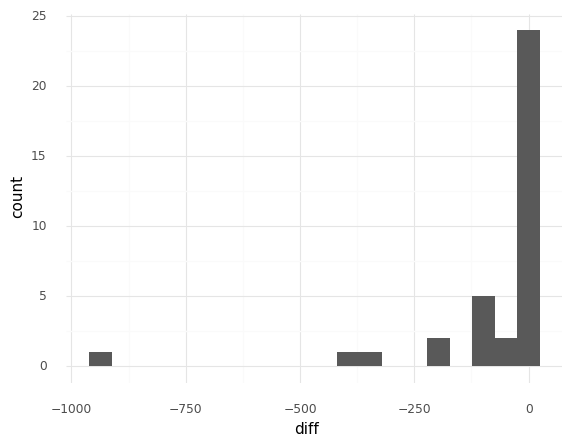

<ggplot: (752933306)>

In [54]:
(
        ggplot(df_ny_readme.query("diff <0")) +
            aes(x='diff') +
            geom_histogram(bins = 20) +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() 
#             facet_wrap("dif_pop > 0", scales="free") 
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
#             labs(
#                 title = "CA Incarcerated Persons per Census Block — Original vs. Adjusted",
#                 y = "Adjusted Population",
#                 x = "U.S. Census Population"
#             )
#             + theme(figure_size=(10, 5)) 
    )

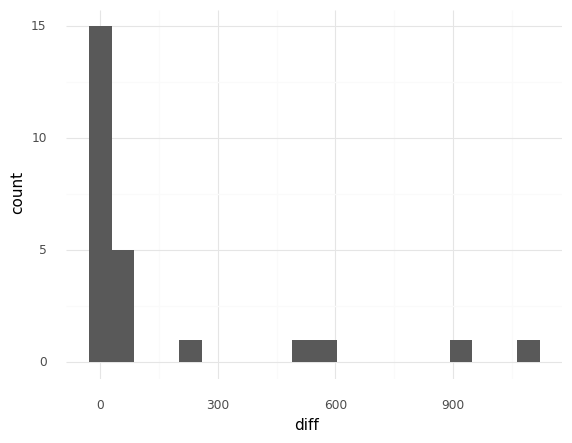

<ggplot: (753679571)>

In [55]:
(
        ggplot(df_ny_readme.query("diff >0")) +
            aes(x='diff') +
            geom_histogram(bins = 20) +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() 
#             facet_wrap("dif_pop > 0", scales="free") 
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
#             labs(
#                 title = "CA Incarcerated Persons per Census Block — Original vs. Adjusted",
#                 y = "Adjusted Population",
#                 x = "U.S. Census Population"
#             )
#             + theme(figure_size=(10, 5)) 
    )

##### Importing in Federal Bureau of Prisons Count in NY state from NY LATFOR

In [56]:
df_ny_readme_fed = pd.read_csv("..//data//handmade//readmes//ny-readme-prison-population_fed.csv", encoding="utf-8")
df_ny_readme_fed

County   Tract  Block                            Housing Facility  \
0       31  960502   1017  Federal Correctional Institution Ray Brook   
1       47    1801   2000      Metropolitan Detention Center Brooklyn   
2       61    2901   1002   Metropolitan Correctional Center New York   
3       71   11500   1002  Federal Correctional Institution Otisville   

  Total Adults+juveniles GQ PL Total  
0                        --        0  
1                     2,562    2,562  
2                       767      767  
3                       597      597

-----

# Colorado

Text
* Zero Populations?
* Has Negative Adjusted Populations

In [24]:
df_co.head(3)

FILEID STUSAB         GEOCODE  COUNTY  TRACT  BLKGRP  BLOCK  AREALAND  \
0   PLST     CO  80010078011000       1   7801       1   1000     20912   
1   PLST     CO  80010078011001       1   7801       1   1001     20185   
2   PLST     CO  80010078011002       1   7801       1   1002     20340   

         NAME   INTPTLAT    INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  39.742879 -104.866410       120       120        82         0   
1  Block 1001  39.742879 -104.867597       156       156       120         0   
2  Block 1002  39.742880 -104.868770       234       234       177         0   

   P0050003  P0050004         GEOID20 county_name  TOTALPOP_ADJ  dif_pop  \
0         0         0  80010078011000       Adams           123        3   
1         0         0  80010078011001       Adams           156        0   
2         0         0  80010078011002       Adams           238        4   

   adjpop  
0     123  
1     156  
2     238

In [25]:
df_co.query("P0020001 == 0").sort_values(by="dif_pop", ascending = False).head(10)

FILEID STUSAB         GEOCODE  COUNTY   TRACT  BLKGRP  BLOCK  AREALAND  \
96915    PLST     CO  80770003001014      77     300       1   1014     17330   
13466    PLST     CO  80050074001008       5    7400       1   1008     20210   
11893    PLST     CO  80050068154018       5    6815       4   4018     77230   
61196    PLST     CO  80410063021008      41    6302       1   1008      7530   
77166    PLST     CO  80590116012002      59   11601       2   2002     15486   
131332   PLST     CO  81230012011004     123    1201       1   1004     63640   
4739     PLST     CO  80010087061016       1    8706       1   1016     13292   
61193    PLST     CO  80410063021005      41    6302       1   1005     27927   
53699    PLST     CO  80410023001022      41    2300       1   1022     22698   
8895     PLST     CO  80039602013037       3  960201       3   3037     17204   

              NAME   INTPTLAT    INTPTLON  P0010001  P0020001  P0030001  \
96915   Block 1014  39.070859 -108.565311         0         0         0   
13466   Block 1008  39.735571 -104.860573         0         0         0   
11893   Block 4018  39.583438 -104.874800         0         0         0   
61196   Block 1008  38.818317 -104.753702         0         0         0   
77166   Block 2002  39.725489 -105.069163         0         0         0   
131332  Block 1004  40.421794 -104.723960         0         0         0   
4739    Block 1016  39.827723 -104.912710         0         0         0   
61193   Block 1005  38.820795 -104.753712         0         0         0   
53699   Block 1022  38.833108 -104.822682         0         0         0   
8895    Block 3037  37.467642 -105.867968         0         0         0   

        P0050001  P0050003  P0050004         GEOID20 county_name  \
96915          0         0         0  80770003001014        Mesa   
13466          0         0         0  80050074001008    Arapahoe   
11893          0         0         0  80050068154018    Arapahoe   
61196          0         0         0  80410063021008     El Paso   
77166          0         0         0  80590116012002   Jefferson   
131332         0         0         0  81230012011004        Weld   
4739           0         0         0  80010087061016       Adams   
61193          0         0         0  80410063021005     El Paso   
53699          0         0         0  80410023001022     El Paso   
8895           0         0         0  80039602013037     Alamosa   

        TOTALPOP_ADJ  dif_pop  adjpop  
96915             13       13      13  
13466             10       10      10  
11893              8        8       8  
61196              6        6       6  
77166              6        6       6  
131332             5        5       5  
4739               5        5       5  
61193              5        5       5  
53699              4        4       4  
8895               4        4       4

##### Importing Table copied from README file with DOC count — Colorado Independent Redistricting Commissions Staff

Source: Memo Incarcerated Persons Adjustments_Aug_6_2021_Legislative_Commission.pdf

In [26]:
df_co_readme = pd.read_csv("..//data//handmade//readmes//co-readme-incarcerated-persons-adjustments-08-06-2021.csv", encoding="utf-8")
df_co_readme

Facility       County   Total 
0             ARKANSAS VALLEY CORRECTIONAL FACILITY      Crowley   1,059 
1                     ARROWHEAD CORRECTIONAL CENTER      Fremont     513 
2                 BENT COUNTY CORRECTIONAL FACILITY         Bent   1,382 
3                  BUENA VISTA CORRECTIONAL COMPLEX      Chaffee     908 
4                        BUENA VISTA MINIMUM CENTER      Chaffee     290 
5              BUENA VISTA TRANSITIONAL WORK CENTER      Chaffee      10 
6                  CENTENNIAL CORRECTIONAL FACILITY      Fremont     403 
7   COLORADO CORRECTIONAL CENTER (CAMP GEORGE WEST)    Jefferson     123 
8                       COLORADO STATE PENITENTIARY      Fremont     706 
9        COLORADO TERRITORIAL CORRECTIONAL FACILITY      Fremont     910 
10             CROWLEY COUNTY CORRECTIONAL FACILITY      Crowley   1,786 
11                        DELTA CORRECTIONAL CENTER        Delta     480 
12           DENVER RECEPTION AND DIAGNOSTIC CENTER       Denver     529 
13              DENVER WOMENS CORRECTIONAL FACILITY       Denver     933 
14                    FOUR MILE CORRECTIONAL CENTER      Fremont     511 
15                    FREMONT CORRECTIONAL FACILITY      Fremont   1,605 
16                   LA VISTA CORRECTIONAL FACILITY       Pueblo     656 
17                      LIMON CORRECTIONAL FACILITY      Lincoln     908 
18                              PAROLE FACILITY CCC       Denver       7 
19                             PAROLE FACILITY DWCF       Denver       2 
20                        RIFLE CORRECTIONAL CENTER     Garfield     194 
21                 SAN CARLOS CORRECTIONAL FACILITY       Pueblo     219 
22                      SKYLINE CORRECTIONAL CENTER      Fremont     250 
23                   STERLING CORRECTIONAL FACILITY        Logan   2,443 
24                   TRINIDAD CORRECTIONAL FACILITY   Las Animas     498 
25                  YOUTHFUL OFFENDER SYSTEM-PUEBLO       Pueblo     181

##### Identifying Facilities in Census Blocks 

In order to identify facilities, I looked up the largest 50 incarceration facilities by population (P0050003) in the census beginning with the most populated. I used the GPS Coordinates from the census to search in Google Maps to identify the facility to match with DOC's count. This work can be seen in the CO-Identifying-Census-Blocks.ipynb notebook. 

In [212]:
df_co.query("P0050003 > 0").sort_values(by="P0050003", ascending  = False).head(3)

FILEID STUSAB         GEOCODE  COUNTY   TRACT  BLKGRP  BLOCK  AREALAND  \
65245   PLST     CO  80439802001000      43  980200       1   1000   2173673   
96619   PLST     CO  80759664001238      75  966400       1   1238    631605   
31481   PLST     CO  80259696012045      25  969601       2   2045    472181   

             NAME   INTPTLAT    INTPTLON  P0010001  P0020001  P0030001  \
65245  Block 1000  38.359615 -105.097914      2532      2532      2532   
96619  Block 1238  40.611755 -103.161651      2436      2436      2436   
31481  Block 2045  38.158903 -103.956907      1776      1776      1776   

       P0050001  P0050003  P0050004         GEOID20 county_name  TOTALPOP_ADJ  \
65245      2532      2532         0  80439802001000     Fremont          2532   
96619      2436      2436         0  80759664001238       Logan           486   
31481      1776      1776         0  80259696012045     Crowley           316   

       dif_pop  adjpop  
65245        0    2532  
96619    -1950     486  
31481    -1460     316

##### Importing Edited README with GEOCODES for facilities to match

In [213]:
df_co_readme2 = pd.read_csv("..//data//handmade//readmes//co-readme-incarcerated-persons-adjustments-08-06-2021_w_blocks.csv", encoding="utf-8")
# df_co_readme2

In [214]:
df_co_readme2 = df_co_readme2.drop(columns=['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'])
df_co_readme2

Facility       County  DOC Total   \
0              ARKANSAS VALLEY CORRECTIONAL FACILITY      Crowley      1,059    
1                      ARROWHEAD CORRECTIONAL CENTER      Fremont        513    
2                  BENT COUNTY CORRECTIONAL FACILITY         Bent      1,382    
3   BUENA VISTA CORRECTIONAL COMPLEX (merged with ...     Chaffee        908    
4                         BUENA VISTA MINIMUM CENTER      Chaffee        290    
5               BUENA VISTA TRANSITIONAL WORK CENTER      Chaffee         10    
6                   CENTENNIAL CORRECTIONAL FACILITY      Fremont        403    
7    COLORADO CORRECTIONAL CENTER (CAMP GEORGE WEST)    Jefferson        123    
8                        COLORADO STATE PENITENTIARY      Fremont        706    
9         COLORADO TERRITORIAL CORRECTIONAL FACILITY      Fremont        910    
10              CROWLEY COUNTY CORRECTIONAL FACILITY      Crowley      1,786    
11                         DELTA CORRECTIONAL CENTER        Delta        480    
12            DENVER RECEPTION AND DIAGNOSTIC CENTER       Denver        529    
13               DENVER WOMENS CORRECTIONAL FACILITY       Denver        933    
14  FOUR MILE CORRECTIONAL CENTER (merged with 804...     Fremont        511    
15                     FREMONT CORRECTIONAL FACILITY      Fremont      1,605    
16                    LA VISTA CORRECTIONAL FACILITY       Pueblo        656    
17                       LIMON CORRECTIONAL FACILITY      Lincoln        908    
18                               PAROLE FACILITY CCC       Denver          7    
19                              PAROLE FACILITY DWCF       Denver          2    
20                         RIFLE CORRECTIONAL CENTER     Garfield        194    
21                  SAN CARLOS CORRECTIONAL FACILITY       Pueblo        219    
22                       SKYLINE CORRECTIONAL CENTER      Fremont        250    
23                    STERLING CORRECTIONAL FACILITY        Logan      2,443    
24                    TRINIDAD CORRECTIONAL FACILITY   Las Animas        498    
25                   YOUTHFUL OFFENDER SYSTEM-PUEBLO       Pueblo        181    

       GEOCODE 2       GEOCODE  Census_pop  adjpop  dif_pop  
0   8.025970e+13           NaN      1063.0   201.0   -862.0  
1   8.043980e+13           NaN       512.0    88.0   -424.0  
2   8.011967e+13  8.011967e+13      1224.0    73.0  -1151.0  
3   8.015000e+13           NaN      1208.0   188.0  -1002.0  
4            NaN           NaN         NaN     NaN      NaN  
5            NaN           NaN         NaN     NaN      NaN  
6   8.043980e+13           NaN       185.0   185.0      0.0  
7   8.059010e+13           NaN       128.0    22.0   -106.0  
8   8.043980e+13           NaN       705.0   149.0   -556.0  
9   8.043980e+13           NaN       564.0  -165.0   -729.0  
10  8.025970e+13           NaN      1776.0   316.0  -1460.0  
11  8.029965e+13           NaN       477.0    83.0   -394.0  
12  8.031004e+13           NaN       651.0   275.0   -376.0  
13  8.031004e+13           NaN       938.0   170.0   -768.0  
14  8.043980e+13  8.043980e+13       507.0    87.0   -420.0  
15  8.043980e+13  8.043980e+13      1419.0   106.0  -1313.0  
16  8.101000e+13           NaN       549.0    -2.0   -551.0  
17  8.073962e+13           NaN       904.0   182.0   -722.0  
18           NaN           NaN         NaN     NaN      NaN  
19           NaN           NaN         NaN     NaN      NaN  
20  8.045952e+13           NaN       187.0    23.0   -164.0  
21  8.101000e+13           NaN       169.0    37.0   -132.0  
22  8.043980e+13           NaN       248.0    47.0   -201.0  
23  8.075966e+13           NaN      2436.0   486.0  -1950.0  
24  8.071001e+13           NaN       482.0    79.0   -403.0  
25           NaN           NaN         NaN     NaN      NaN

-----

### New Jersey

Text
* Has Zero Populations (7 census blocks)
* Has Negative Adjusted Populations (7 census blocks)

In [42]:
df_nj.head(3)

FILEID STUSAB          GEOCODE  COUNTY  TRACT  BLKGRP  BLOCK  AREALAND  \
0   PLST     NJ  340010001001000       1    100       1   1000         0   
1   PLST     NJ  340010001001001       1    100       1   1001    552994   
2   PLST     NJ  340010001001002       1    100       1   1002      9154   

         NAME   INTPTLAT   INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  39.362701 -74.456205         0         0         0         0   
1  Block 1001  39.359901 -74.457522         0         0         0         0   
2  Block 1002  39.359479 -74.461735        27        27        17         0   

   P0050003  P0050004  STATE  order  State  County  Municipality  Tract  \
0         0         0     34      0     34       1          2080    100   
1         0         0     34      1     34       1          2080    100   
2         0         0     34      2     34       1          2080    100   

   Group  Block     VTD VTDI      County Name   Municipality Name    Areaname  \
0      1   1000  010501    A  Atlantic County  Atlantic City city  Block 1000   
1      1   1001  010501    A  Atlantic County  Atlantic City city  Block 1001   
2      1   1002  010501    A  Atlantic County  Atlantic City city  Block 1002   

   Population  Total  18plus  dif_pop  adjpop  
0           0      0       0        0       0  
1           0      0       0        0       0  
2          27     22      17        0      27

In [43]:
df_nj.query("Population == 0").sort_values(by="dif_pop", ascending = True).head(10)

FILEID STUSAB          GEOCODE  COUNTY   TRACT  BLKGRP  BLOCK  AREALAND  \
28353   PLST     NJ  340059822003049       5  982200       3   3049   1417514   
42623   PLST     NJ  340110104021000      11   10402       1   1000   1093686   
91758   PLST     NJ  340258112001016      25  811200       1   1016         0   
91756   PLST     NJ  340258112001014      25  811200       1   1014         0   
91748   PLST     NJ  340258112001006      25  811200       1   1006      2149   
91744   PLST     NJ  340258112001002      25  811200       1   1002       202   
91742   PLST     NJ  340258112001000      25  811200       1   1000         0   
91741   PLST     NJ  340258111024071      25  811102       4   4071    256549   
91740   PLST     NJ  340258111024070      25  811102       4   4070      5361   
91739   PLST     NJ  340258111024069      25  811102       4   4069       908   

             NAME   INTPTLAT   INTPTLON  P0010001  P0020001  P0030001  \
28353  Block 3049  40.001083 -74.630932      3013      3013      3008   
42623  Block 1000  39.385080 -75.160600      1054      1054      1039   
91758  Block 1016  40.180337 -74.183965         0         0         0   
91756  Block 1014  40.186534 -74.185749         0         0         0   
91748  Block 1006  40.200169 -74.213298         0         0         0   
91744  Block 1002  40.205072 -74.227785         0         0         0   
91742  Block 1000  40.201897 -74.209864         0         0         0   
91741  Block 4071  40.230748 -74.195641         0         0         0   
91740  Block 4070  40.225587 -74.140165         0         0         0   
91739  Block 4069  40.225135 -74.140350         0         0         0   

       P0050001  P0050003  P0050004  STATE  order  State  County  \
28353      2997      2997         0     34  28353     34       5   
42623      1035      1035         0     34  42623     34      11   
91758         0         0         0     34  91758     34      25   
91756         0         0         0     34  91756     34      25   
91748         0         0         0     34  91748     34      25   
91744         0         0         0     34  91744     34      25   
91742         0         0         0     34  91742     34      25   
91741         0         0         0     34  91741     34      25   
91740         0         0         0     34  91740     34      25   
91739         0         0         0     34  91739     34      25   

       Municipality   Tract  Group  Block     VTD VTDI        County Name  \
28353         51510  982200      3   3049  130001    A  Burlington County   
42623         22350   10402      1   1000  025001    A  Cumberland County   
91758         33300  811200      1   1016  095001    A    Monmouth County   
91756         33300  811200      1   1014  095005    A    Monmouth County   
91748         33300  811200      1   1006  095014    A    Monmouth County   
91744         33300  811200      1   1002  095014    A    Monmouth County   
91742         33300  811200      1   1000  095014    A    Monmouth County   
91741         33300  811102      4   4071  095027    A    Monmouth County   
91740         33300  811102      4   4070  095001    A    Monmouth County   
91739         33300  811102      4   4069  095001    A    Monmouth County   

          Municipality Name    Areaname  Population  Total  18plus  dif_pop  \
28353  New Hanover township  Block 3049           0      0       0    -3013   
42623    Fairfield township  Block 1000           0      0       0    -1054   
91758       Howell township  Block 1016           0      0       0        0   
91756       Howell township  Block 1014           0      0       0        0   
91748       Howell township  Block 1006           0      0       0        0   
91744       Howell township  Block 1002           0      0       0        0   
91742       Howell township  Block 1000           0      0       0        0   
91741       Howell township  Block 4071           0      0       0        0   
91

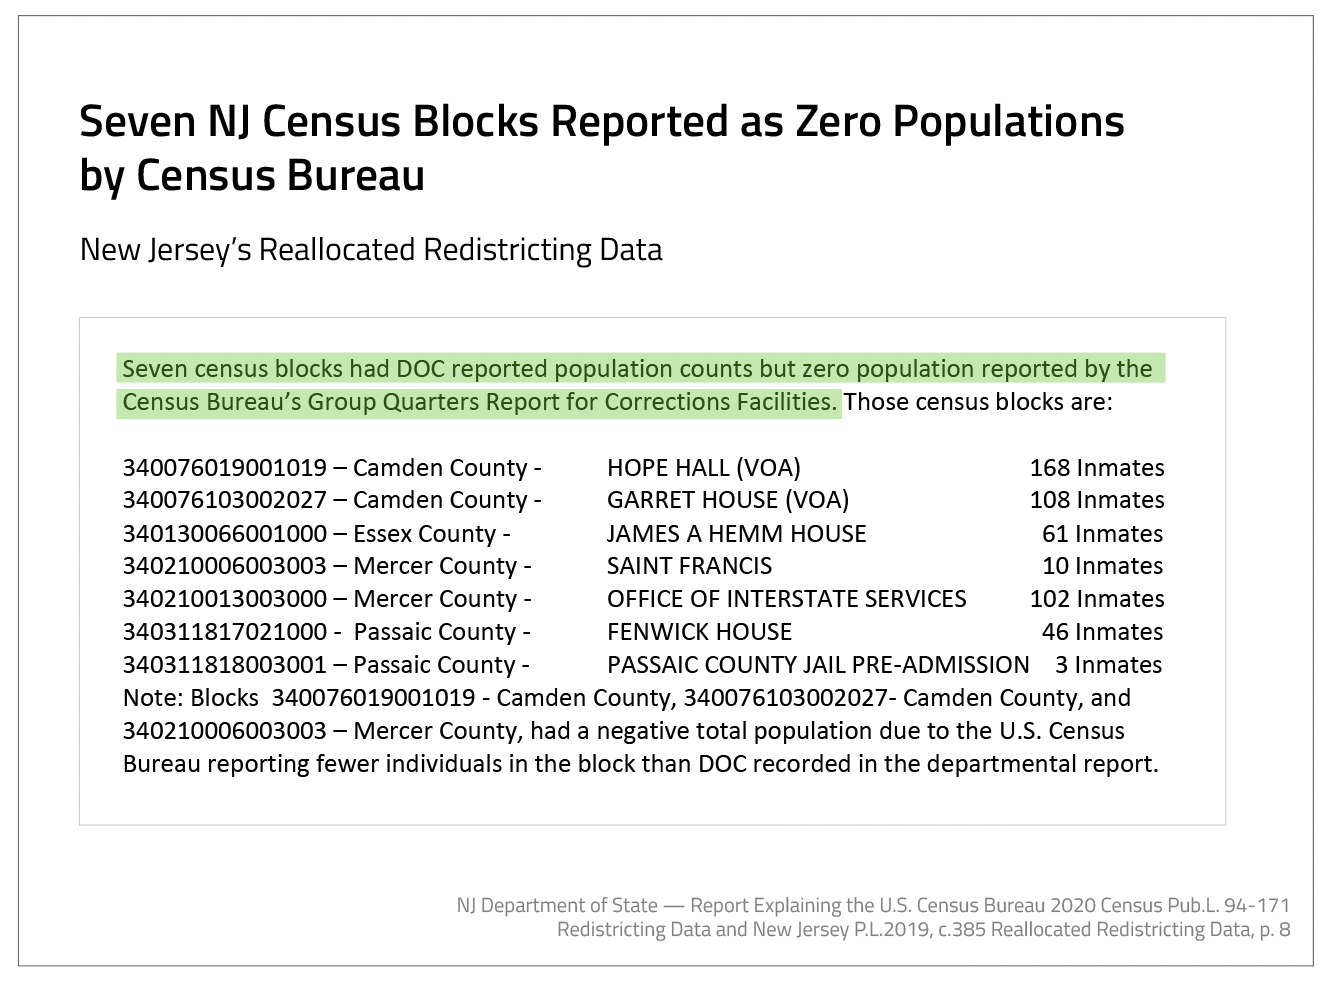

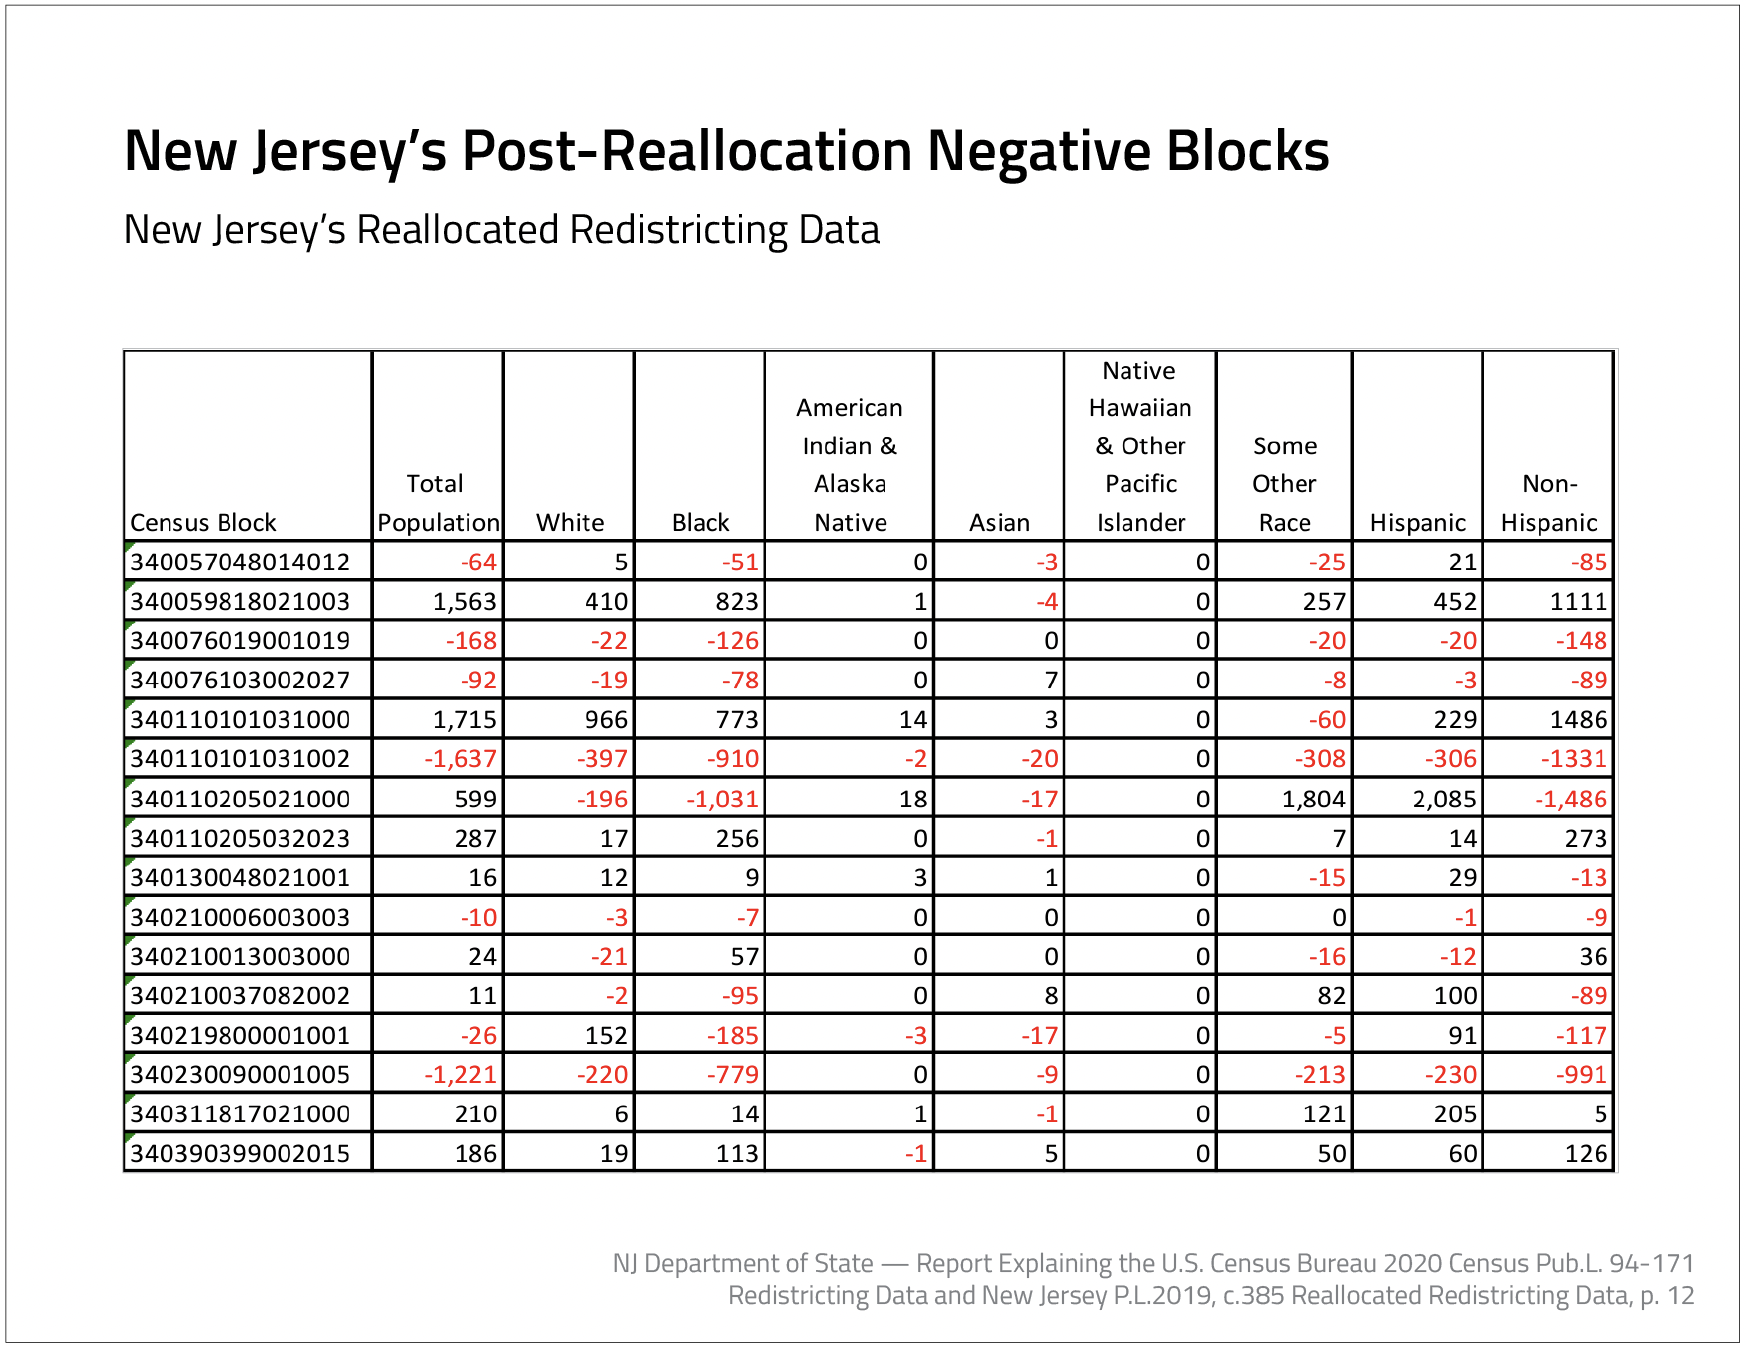

-----

# Connecticut

Text
* Has Zero Populations?
* Has Negative Adjusted Populations

In [30]:
df_ct.head(3)

FILEID STUSAB         GEOCODE  COUNTY  TRACT  BLKGRP  BLOCK  AREALAND  \
0   PLST     CT  90010101011000       1  10101       1   1000    123621   
1   PLST     CT  90010101011001       1  10101       1   1001   2032541   
2   PLST     CT  90010101011002       1  10101       1   1002   1227724   

         NAME   INTPTLAT   INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  41.125774 -73.671811        27        27        23         0   
1  Block 1001  41.115624 -73.674234       198       198       149         0   
2  Block 1002  41.108930 -73.686944        18        18        12         0   

   P0050003  P0050004       Town         GEOID20  P0030001 - Original  \
0         0         0  Greenwich  90010101011000                   23   
1         0         0  Greenwich  90010101011001                  149   
2         0         0  Greenwich  90010101011002                   12   

   P0030001 - Adjusted  P0030001 - Difference  \
0                   23                      0   
1                  149                      0   
2                   13                      1   

                                            Geometry  dif_cf  adjpop  
0  MULTIPOLYGON (((-73.676417 41.124666999999995,...       0      23  
1  MULTIPOLYGON (((-73.68428999999999 41.110071, ...       0     149  
2  MULTIPOLYGON (((-73.693623 41.10838, -73.69349...       1      13

-----

# Nevada

Text
* Has Zero Populations?
* Does Not Have Negative Adjusted Populations

In [44]:
df_nv.head(3)

FILEID STUSAB          GEOCODE  COUNTY   TRACT  BLKGRP  BLOCK   AREALAND  \
0   PLST     NV  320019501001000       1  950100       1   1000  189454886   
1   PLST     NV  320019501001001       1  950100       1   1001   61766429   
2   PLST     NV  320019501001002       1  950100       1   1002   40086131   

         NAME   INTPTLAT    INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  39.950029 -117.596185         0         0         0         0   
1  Block 1001  39.948144 -117.748221         0         0         0         0   
2  Block 1002  39.970603 -117.811940         0         0         0         0   

   P0050003  P0050004  STATEFP20  COUNTYFP20  TRACTCE20  BLOCKCE20  \
0         0         0         32           1     950100       1000   
1         0         0         32           1     950100       1001   
2         0         0         32           1     950100       1002   

           GEOID20                     GEOID  ADJPOP  dif_pop  adjpop  
0  320019501001000  7500000US320019501001000       0        0       0  
1  320019501001001  7500000US320019501001001       0        0       0  
2  320019501001002  7500000US320019501001002       0        0       0

In [45]:
df_nv.query("P0020001 == 0").sort_values(by="dif_pop", ascending = False).head(10)

FILEID STUSAB          GEOCODE  COUNTY   TRACT  BLKGRP  BLOCK  AREALAND  \
45536   PLST     NV  320279601005000      27  960100       5   5000   5076193   
2174    PLST     NV  320030005143000       3     514       3   3000     82382   
2455    PLST     NV  320030005231000       3     523       1   1000    225380   
24172   PLST     NV  320030078022001       3    7802       2   2001   2734938   
2611    PLST     NV  320030007002003       3     700       2   2003     16998   
48442   PLST     NV  320310021071019      31    2107       1   1019     19456   
47881   PLST     NV  320310015014002      31    1501       4   4002     70738   
2633    PLST     NV  320030007003014       3     700       3   3014     33429   
4485    PLST     NV  320030028081007       3    2808       1   1007    155501   
1772    PLST     NV  320030002033009       3     203       3   3009     11777   

             NAME   INTPTLAT    INTPTLON  P0010001  P0020001  P0030001  \
45536  Block 5000  40.226291 -118.393007         0         0         0   
2174   Block 3000  36.175307 -115.081528         0         0         0   
2455   Block 1000  36.164540 -115.108557         0         0         0   
24172  Block 2001  36.255730 -115.014983         0         0         0   
2611   Block 2003  36.167559 -115.145412         0         0         0   
48442  Block 1019  39.526617 -119.787336         0         0         0   
47881  Block 4002  39.549940 -119.805150         0         0         0   
2633   Block 3014  36.170810 -115.142545         0         0         0   
4485   Block 1007  36.056238 -115.105102         0         0         0   
1772   Block 3009  36.163378 -115.161778         0         0         0   

       P0050001  P0050003  P0050004  STATEFP20  COUNTYFP20  TRACTCE20  \
45536         0         0         0         32          27     960100   
2174          0         0         0         32           3        514   
2455          0         0         0         32           3        523   
24172         0         0         0         32           3       7802   
2611          0         0         0         32           3        700   
48442         0         0         0         32          31       2107   
47881         0         0         0         32          31       1501   
2633          0         0         0         32           3        700   
4485          0         0         0         32           3       2808   
1772          0         0         0         32           3        203   

       BLOCKCE20          GEOID20                     GEOID  ADJPOP  dif_pop  \
45536       5000  320279601005000  7500000US320279601005000       7        7   
2174        3000  320030005143000  7500000US320030005143000       6        6   
2455        1000  320030005231000  7500000US320030005231000       5        5   
24172       2001  320030078022001  7500000US320030078022001       4        4   
2611        2003  320030007002003  7500000US320030007002003       2        2   
48442       1019  320310021071019  7500000US320310021071019       2        2   
47881       4002  320310015014002  7500000US320310015014002       2        2   
2633        3014  320030007003014  7500000US320030007003014       2        2   
4485        1007  320030028081007  7500000US320030028081007       2        2   
1772        3009  320030002033009  7500000US320030002033009       2        2   

       adjpop  
45536       7  
2174        6  
2455        5  
24172       4  
2611        2  
48442       2  
47881       2  
2633        2  
4485        2  
1772        2

-----

# Virginia

Text

-

-

In [57]:
df_va.head(3)

FILEID STUSAB          GEOCODE  COUNTY  TRACT  BLKGRP  BLOCK  AREALAND  \
0   PLST     VA  510010901011000       1  90101       1   1000    219012   
1   PLST     VA  510010901011001       1  90101       1   1001    221888   
2   PLST     VA  510010901011002       1  90101       1   1002       203   

         NAME   INTPTLAT   INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  37.948163 -75.368287         0         0         0         0   
1  Block 1001  37.952655 -75.351859        19        19        15         0   
2  Block 1002  37.945171 -75.364397         0         0         0         0   

   P0050003  P0050004     fid          GEOID20      NAME20  TAPERSONS  \
0         0         0  130456  510010901011000  Block 1000          0   
1         0         0   11581  510010901011001  Block 1001         19   
2         0         0  147640  510010901011002  Block 1002          0   

   PRADJPOPD  ADJPOP  dif_pop  adjpop  
0          0       0        0       0  
1          0      19        0      19  
2          0       0        0       0

In [58]:
df_va.query("P0020001 == 0").sort_values(by="dif_pop", ascending = False).head(10)

FILEID STUSAB          GEOCODE  COUNTY   TRACT  BLKGRP  BLOCK  \
90838    PLST     VA  511539012323002     153  901232       3   3002   
131247   PLST     VA  516500106012021     650   10601       2   2021   
146190   PLST     VA  517402132002014     740  213200       2   2014   
152242   PLST     VA  517700011002018     770    1100       2   2018   
148218   PLST     VA  517600305021002     760   30502       1   1002   
6465     PLST     VA  510090106002018       9   10600       2   2018   
162118   PLST     VA  518200031001041     820    3100       1   1041   
133355   PLST     VA  516708205002032     670  820500       2   2032   
153039   PLST     VA  517700024003065     770    2400       3   3065   
132915   PLST     VA  516600004023009     660     402       3   3009   

        AREALAND        NAME   INTPTLAT   INTPTLON  P0010001  P0020001  \
90838      45614  Block 3002  38.752007 -77.478604         0         0   
131247     19900  Block 2021  37.025044 -76.348794         0         0   
146190      3632  Block 2014  36.836721 -76.311809         0         0   
152242     27817  Block 2018  37.269961 -79.946894         0         0   
148218     11149  Block 1002  37.541140 -77.435633         0         0   
6465      955454  Block 2018  37.404135 -79.091951         0         0   
162118     12289  Block 1041  38.069778 -78.895900         0         0   
133355      4282  Block 2032  37.294335 -77.302887         0         0   
153039      2135  Block 3065  37.287609 -79.977471         0         0   
132915     16825  Block 3009  38.454856 -78.868457         0         0   

        P0030001  P0050001  P0050003  P0050004     fid          GEOID20  \
90838          0         0         0         0   90727  511539012323002   
131247         0         0         0         0  151631  516500106012021   
146190         0         0         0         0  148399  517402132002014   
152242         0         0         0         0   79926  517700011002018   
148218         0         0         0         0  104609  517600305021002   
6465           0         0         0         0   81066  510090106002018   
162118         0         0         0         0   14497  518200031001041   
133355         0         0         0         0   28781  516708205002032   
153039         0         0         0         0  119314  517700024003065   
132915         0         0         0         0   39695  516600004023009   

            NAME20  TAPERSONS  PRADJPOPD  ADJPOP  dif_pop  adjpop  
90838   Block 3002          0         18      18       18      18  
131247  Block 2021          0         18      18       18      18  
146190  Block 2014          0         17      17       17      17  
152242  Block 2018          0         14      14       14      14  
148218  Block 1002          0         11      11       11      11  
6465    Block 2018          0         10      10       10      10  
162118  Block 1041          0          9       9        9       9  
133355  Block 2032          0          9       9        9       9  
153039  Block 3065          0          9       9        9       9  
132915  Block 3009          0          7       7        7       7

-----

# Washington

Text
* Zero Populations?
* Has Negative Adjusted Populations

-

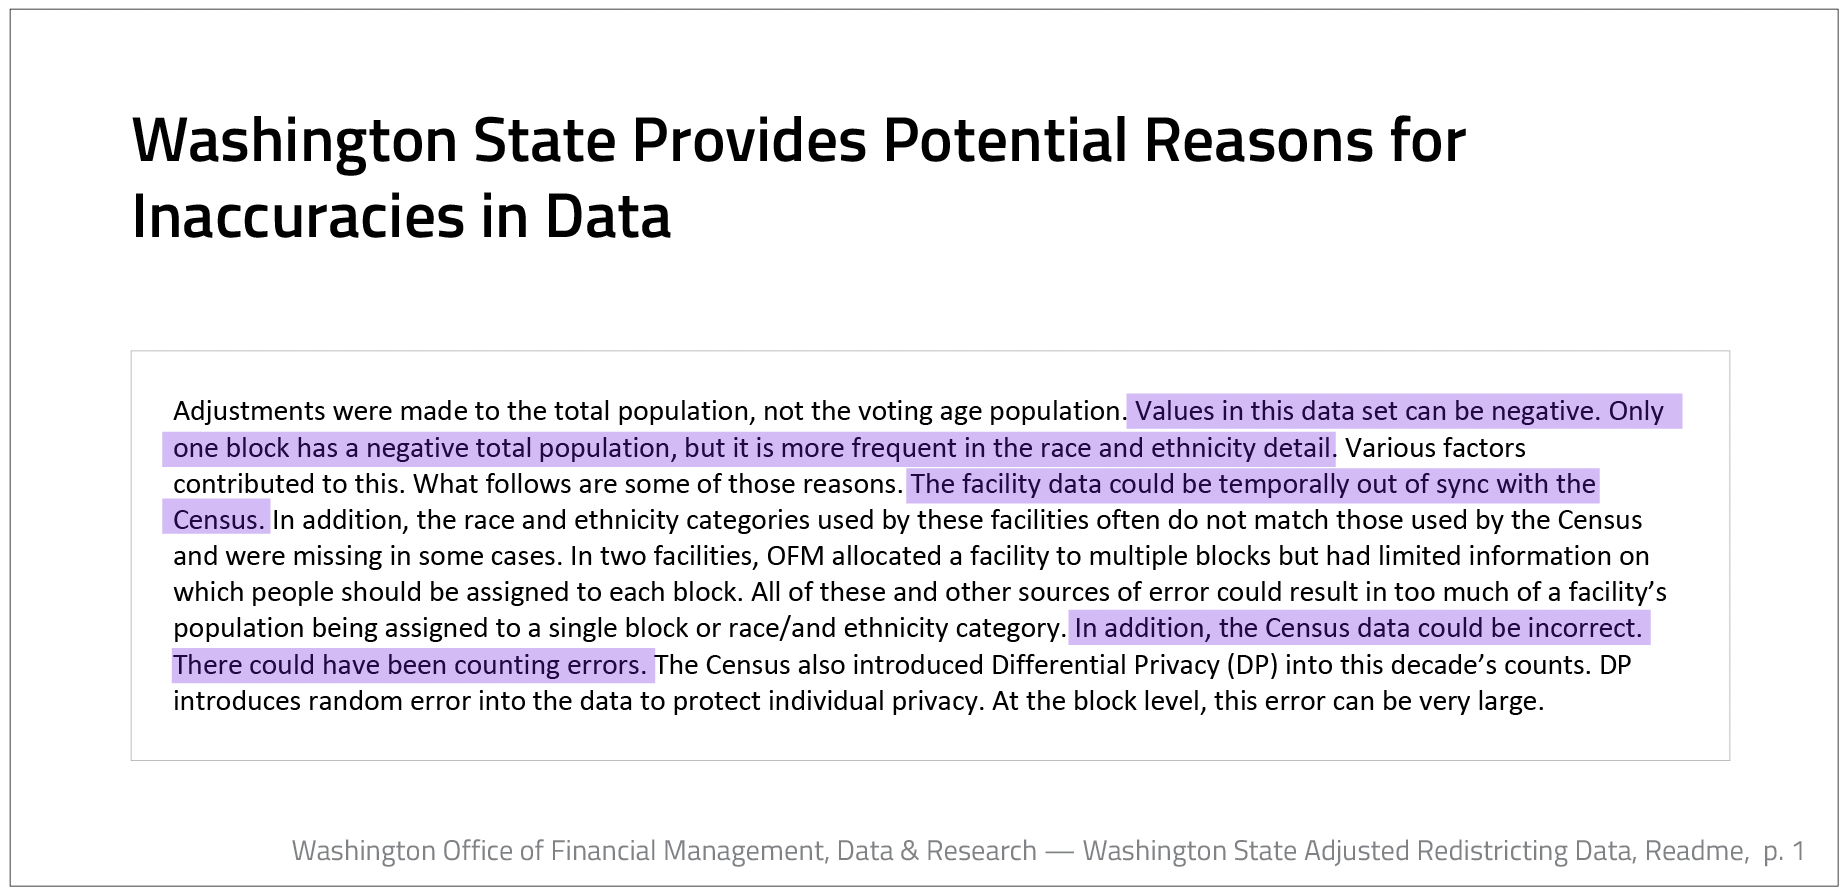

-

In [59]:
df_wa.head(3)

FILEID STUSAB          GEOCODE  COUNTY   TRACT  BLKGRP  BLOCK   AREALAND  \
0   PLST     WA  530019501001000       1  950100       1   1000  126940523   
1   PLST     WA  530019501001001       1  950100       1   1001     371748   
2   PLST     WA  530019501001002       1  950100       1   1002    2445833   

         NAME   INTPTLAT    INTPTLON  P0010001  P0020001  P0030001  P0050001  \
0  Block 1000  47.198731 -118.099119        11        11         7         0   
1  Block 1001  47.219313 -118.017245         0         0         0         0   
2  Block 1002  47.234578 -118.096781         0         0         0         0   

   P0050003  P0050004          GEOID20  TotalPop  GQPop  UTotalPop  UGQPop  \
0         0         0  530019501001000        11      0         11       0   
1         0         0  530019501001001         0      0          0       0   
2         0         0  530019501001002         0      0          0       0   

  Adjusted OrigFacBlk DestBlk PreSubtrct PreAdd  dif_pop  adjpop  
0      NaN        NaN     NaN        NaN    NaN        0      11  
1      NaN        NaN     NaN        NaN    NaN        0       0  
2      NaN        NaN     NaN        NaN    NaN        0       0

In [60]:
df_wa.query("P0020001 == 0").sort_values(by="dif_pop", ascending = False).head(10)

FILEID STUSAB          GEOCODE  COUNTY   TRACT  BLKGRP  BLOCK  \
11937    PLST     WA  530090024003216       9    2400       3   3216   
58394    PLST     WA  530330292033003      33   29203       3   3003   
77460    PLST     WA  530419708004035      41  970800       4   4035   
46429    PLST     WA  530330081022030      33    8102       2   2030   
86180    PLST     WA  530479707001055      47  970700       1   1055   
133827   PLST     WA  530659503003048      65  950300       3   3048   
110029   PLST     WA  530610407003000      61   40700       3   3000   
123401   PLST     WA  530630032002008      63    3200       2   2008   
109992   PLST     WA  530610407001003      61   40700       1   1003   
92350    PLST     WA  530530617004020      53   61700       4   4020   

        AREALAND        NAME   INTPTLAT    INTPTLON  P0010001  P0020001  \
11937     110909  Block 3216  48.239448 -124.286857         0         0   
58394      20634  Block 3003  47.385945 -122.238180         0         0   
77460       4064  Block 4035  46.661722 -122.969351         0         0   
46429      14113  Block 2030  47.602450 -122.330352         0         0   
86180       6149  Block 1055  48.365551 -119.582521         0         0   
133827     13435  Block 3048  48.542834 -117.903568         0         0   
110029     15238  Block 3000  47.977232 -122.206462         0         0   
123401     36791  Block 2008  47.647792 -117.412806         0         0   
109992     15494  Block 1003  47.977262 -122.205066         0         0   
92350      22319  Block 4020  47.234104 -122.448310         0         0   

        P0030001  P0050001  P0050003  P0050004          GEOID20  TotalPop  \
11937          0         0         0         0  530090024003216        83   
58394          0         0         0         0  530330292033003        25   
77460          0         0         0         0  530419708004035        19   
46429          0         0         0         0  530330081022030        17   
86180          0         0         0         0  530479707001055        12   
133827         0         0         0         0  530659503003048         9   
110029         0         0         0         0  530610407003000         6   
123401         0         0         0         0  530630032002008         6   
109992         0         0         0         0  530610407001003         5   
92350          0         0         0         0  530530617004020         4   

        GQPop  UTotalPop  UGQPop Adjusted OrigFacBlk DestBlk PreSubtrct  \
11937      77          0       0        Y          Y       Y        NaN   
58394       0          0       0        Y        NaN       Y        NaN   
77460       0          0       0        Y        NaN       Y        NaN   
46429       0          0       0        Y        NaN       Y        NaN   
86180       0          0       0        Y        NaN       Y        NaN   
133827      0          0       0        Y        NaN       Y        NaN   
110029      0          0       0        Y        NaN       Y        NaN   
123401      0          0       0        Y        NaN       Y        NaN   
109992      0          0       0        Y        NaN       Y        NaN   
92350       0          0       0        Y        NaN       Y        NaN   

       PreAdd  dif_pop  adjpop  
11937       Y       83      83  
58394     NaN       25      25  
77460     NaN       19      19  
46429     NaN       17      17  
86180     NaN       12      12  
133827    NaN        9       9  
110029    NaN        6       6  
123401    NaN        6       6  
109992    NaN        5       5  
92350     NaN        4       4

In [61]:
(
        ggplot(df_wa) +
            aes(x='GEOCODE', y='dif_pop') +
            geom_point() +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() +
            facet_wrap("dif_pop > 0", scales="free_y") +
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
            labs(
                title = "WA Incarcerated Persons per Census Block — Original vs. Adjusted",
                y = "",
                x = ""
            )
            + theme(figure_size=(10, 5)) 
    )

<ggplot: (753710846)>

----

----

# California

Text
* Zero Populations?
* Does Not Have Negative Adjusted Populations

In [196]:
df_ca.head(3)

BLOCK20  COUNTY   TRACT  BLOCK  P0020001  Population P2  P0030001  \
0  60014001001000       1  400100   1000         0              0         0   
1  60014001001001       1  400100   1001         0              0         0   
2  60014001001002       1  400100   1002         0              0         0   

   18+_Population P4  P0050003  GQ_Inst_CFAdult  P0050004  GQ_Inst_Juvenile  \
0                  0         0                0         0                 0   
1                  0         0                0         0                 0   
2                  0         0                0         0                 0   

   AREALAND        NAME   INTPTLAT    INTPTLON  dif_pop  adjpop  
0     51124  Block 1000  37.880348 -122.228550        0       0  
1    695414  Block 1001  37.879219 -122.228772        0       0  
2      9330  Block 1002  37.882910 -122.238471        0       0

Census Bureau Zero Populations in a census block but there are people counted in the adjusted population 

In [197]:
df_ca.query("P0020001 == 0").sort_values(by="dif_pop", ascending = False).head(10)

BLOCK20  COUNTY   TRACT  BLOCK  P0020001  Population P2  \
237971  60590016031021      59    1603   1021         0              6   
181630  60376200013000      37  620001   3000         0              6   
254782  60590761024006      59   76102   4006         0              6   
23320   60070028002044       7    2800   2044         0              5   
173335  60375702032005      37  570203   2005         0              5   
201799  60379800131026      37  980013   1026         0              5   
137155  60372780012020      37  278001   2020         0              5   
50107   60190038051003      19    3805   1003         0              5   
333967  60710086021028      71    8602   1028         0              4   
202402  60379800281080      37  980028   1080         0              4   

        P0030001  18+_Population P4  P0050003  GQ_Inst_CFAdult  P0050004  \
237971         0                  6         0                0         0   
181630         0                  6         0                0         0   
254782         0                  6         0                0         0   
23320          0                  5         0                0         0   
173335         0                  5         0                0         0   
201799         0                  5         0                0         0   
137155         0                  5         0                0         0   
50107          0                  5         0                0         0   
333967         0                  4         0                0         0   
202402         0                  4         0                0         0   

        GQ_Inst_Juvenile  AREALAND        NAME   INTPTLAT    INTPTLON  \
237971                 0     43402  Block 1021  33.885027 -117.925072   
181630                 0     37949  Block 3000  33.931070 -118.407063   
254782                 0     52034  Block 4006  33.781684 -117.895956   
23320                  0     86127  Block 2044  39.504772 -121.554690   
173335                 0    264714  Block 2005  33.879041 -118.166510   
201799                 0   1420682  Block 1026  33.910528 -118.390390   
137155                 0      2076  Block 2020  33.953987 -118.396203   
50107                  0     35964  Block 1003  36.779514 -119.847598   
333967                 0   2083260  Block 1028  34.084510 -117.128625   
202402                 0     26583  Block 1080  33.931050 -118.392224   

        dif_pop  adjpop  
237971        6       6  
181630        6       6  
254782        6       6  
23320         5       5  
173335        5       5  
201799        5       5  
137155        5       5  
50107         5       5  
333967        4       4  
202402        4       4

In [198]:
df_ca.query("dif_pop < 0").sort_values(by="dif_pop", ascending = False)

BLOCK20  COUNTY   TRACT  BLOCK  P0020001  Population P2  \
18523   60030100001048       3   10000   1048         1              0   
138683  60372971101013      37  297110   1013        23             21   
383418  60730209021092      73   20902   1092         2              0   
178497  60375990002007      37  599000   2007        52             49   
125416  60372035001009      37  203500   1009       183            180   
...                ...     ...     ...    ...       ...            ...   
89751   60290043021001      29    4302   1001      4342              0   
90858   60290046011001      29    4601   1001      4971             22   
105833  60319801001004      31  980100   1004      5506              0   
320138  60679883001003      67  988300   1003      5627             52   
301620  60659810001003      65  981000   1003      5972              0   

        P0030001  18+_Population P4  P0050003  GQ_Inst_CFAdult  P0050004  \
18523          1                  0         1                0         0   
138683        17                 15         2                0         2   
383418         2                  0         2                0         0   
178497        50                 47         3                0         0   
125416       161                158         3                0         0   
...          ...                ...       ...              ...       ...   
89751       4342                  0      4342                0         0   
90858       4969                 20      4949                0         0   
105833      5506                  0      5506                0         0   
320138      5604                 29      5575                0         0   
301620      5972                  0      5972                0         0   

        GQ_Inst_Juvenile  AREALAND        NAME   INTPTLAT    INTPTLON  \
18523                  0     75878  Block 1048  38.703436 -120.051074   
138683                 2      8591  Block 1013  33.734651 -118.280913   
383418                 0   4245950  Block 1092  32.956323 -116.549999   
178497                 0     18582  Block 2007  33.343304 -118.327052   
125416                 0     84787  Block 1009  34.049326 -118.217206   
...                  ...       ...         ...        ...         ...   
89751                  0   1211566  Block 1001  35.594172 -119.415894   
90858                  0   2546742  Block 1001  35.783088 -119.312332   
105833                 0   1303680  Block 1004  36.053283 -119.549993   
320138                 0   3026457  Block 1003  38.694187 -121.156830   
301620                 0   1475722  Block 1003  33.561347 -114.924365   

        dif_pop  adjpop  
18523        -1       0  
138683       -2      21  
383418       -2       0  
178497       -3      49  
125416       -3     180  
...         ...     ...  
89751     -4342       0  
90858     -4949      22  
105833    -5506       0  
320138    -5575      52  
301620    -5972       0  

[142 rows x 18 columns]

In [199]:
df_ca.query("dif_pop > 0").sort_values(by="dif_pop", ascending = False)

BLOCK20  COUNTY   TRACT  BLOCK  P0020001  Population P2  \
168248  60375425011004      37  542501   1004      1234           1262   
131358  60372361012002      37  236101   2002      1365           1388   
82912   60290015001000      29    1500   1000         4             25   
131390  60372362051001      37  236205   1001      1061           1081   
191748  60379006093003      37  900609   3003       526            544   
...                ...     ...     ...    ...       ...            ...   
180608  60376028021006      37  602802   1006        78             79   
180609  60376028021007      37  602802   1007       105            106   
180613  60376028021011      37  602802   1011        84             85   
180617  60376028021015      37  602802   1015        93             94   
519720  61150411021046     115   41102   1046        18             19   

        P0030001  18+_Population P4  P0050003  GQ_Inst_CFAdult  P0050004  \
168248       760                788         0                0         0   
131358      1093               1116         0                0         0   
82912          3                 24         0                0         0   
131390       758                778         0                0         0   
191748       360                378         0                0         0   
...          ...                ...       ...              ...       ...   
180608        69                 70         0                0         0   
180609        83                 84         0                0         0   
180613        63                 64         0                0         0   
180617        77                 78         0                0         0   
519720        12                 13         0                0         0   

        GQ_Inst_Juvenile  AREALAND        NAME   INTPTLAT    INTPTLON  \
168248                 0    140757  Block 1004  33.890840 -118.235416   
131358                 0     82548  Block 2002  34.013714 -118.344141   
82912                  0     17890  Block 1000  35.375823 -118.990748   
131390                 0     63680  Block 1001  34.013474 -118.352403   
191748                 0    174839  Block 3003  34.693219 -118.101458   
...                  ...       ...         ...        ...         ...   
180608                 0     21706  Block 1006  33.922594 -118.297446   
180609                 0     22655  Block 1007  33.922590 -118.295153   
180613                 0     21566  Block 1011  33.921659 -118.297458   
180617                 0     23259  Block 1015  33.920702 -118.295164   
519720                 0   3003346  Block 1046  39.332694 -121.211516   

        dif_pop  adjpop  
168248       28    1262  
131358       23    1388  
82912        21      25  
131390       20    1081  
191748       18     544  
...         ...     ...  
180608        1      79  
180609        1     106  
180613        1      85  
180617        1      94  
519720        1      19  

[81455 rows x 18 columns]

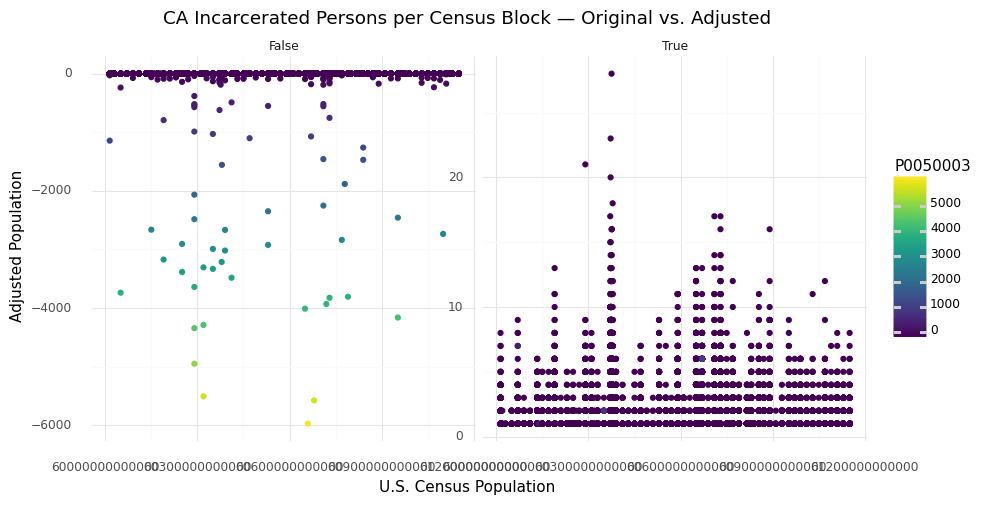

<ggplot: (752878433)>

In [200]:
(
        ggplot(df_ca) +
            aes(x='BLOCK20', y='dif_pop', color = 'P0050003') +
            geom_point() +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() +
            facet_wrap("dif_pop > 0", scales="free_y") +
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
            labs(
                title = "CA Incarcerated Persons per Census Block — Original vs. Adjusted",
                y = "Adjusted Population",
                x = "U.S. Census Population"
            )
            + theme(figure_size=(10, 5)) 
    )

In [201]:
df_ca.query("dif_pop !=0")

BLOCK20  COUNTY   TRACT  BLOCK  P0020001  Population P2  \
10      60014001001010       1  400100   1010       130            131   
18      60014001001018       1  400100   1018       342            343   
26      60014001001026       1  400100   1026       188            189   
62      60014002001006       1  400200   1006        68             69   
143     60014003003018       1  400300   3018       464            465   
...                ...     ...     ...    ...       ...            ...   
519679  61150411021005     115   41102   1005       100            102   
519681  61150411021007     115   41102   1007        14             15   
519683  61150411021009     115   41102   1009       145            146   
519713  61150411021039     115   41102   1039        54             55   
519720  61150411021046     115   41102   1046        18             19   

        P0030001  18+_Population P4  P0050003  GQ_Inst_CFAdult  P0050004  \
10           117                118         0                0         0   
18           303                304         0                0         0   
26           161                162         0                0         0   
62            56                 57         0                0         0   
143          394                395         0                0         0   
...          ...                ...       ...              ...       ...   
519679        91                 93         0                0         0   
519681        14                 15         0                0         0   
519683       110                111         0                0         0   
519713        53                 54         0                0         0   
519720        12                 13         0                0         0   

        GQ_Inst_Juvenile  AREALAND        NAME   INTPTLAT    INTPTLON  \
10                     0   1121172  Block 1010  37.869200 -122.230637   
18                     0    299689  Block 1018  37.861107 -122.238087   
26                     0    291826  Block 1026  37.859558 -122.228693   
62                     0     21187  Block 1006  37.851179 -122.248694   
143                    0     45219  Block 3018  37.839065 -122.263160   
...                  ...       ...         ...        ...         ...   
519679                 0   5508213  Block 1005  39.356590 -121.210378   
519681                 0    238650  Block 1007  39.374204 -121.209049   
519683                 0   4068251  Block 1009  39.370061 -121.225782   
519713                 0   1427302  Block 1039  39.353147 -121.231604   
519720                 0   3003346  Block 1046  39.332694 -121.211516   

        dif_pop  adjpop  
10            1     131  
18            1     343  
26            1     189  
62            1      69  
143           1     465  
...         ...     ...  
519679        2     102  
519681        1      15  
519683        1     146  
519713        1      55  
519720        1      19  

[81597 rows x 18 columns]

In [202]:
piv_ca1 = df_ca.groupby(by="COUNTY").sum().reset_index()

In [203]:
piv_ca1.head(5)

COUNTY              BLOCK20       TRACT     BLOCK  P0020001  Population P2  \
0       1  1108764762836124544  8001279689  39234529   1682353        1683468   
1       3    12126080200222300     2020000    222301      1204           1207   
2       5    70919053163939568      316166   2279571     40474          36592   
3       7   296325414384996672    10437349  11506683    211632         212549   
4       9   111947675652057456      564830   3757449     45292          45306   

   P0030001  18+_Population P4  P0050003  GQ_Inst_CFAdult  P0050004  \
0   1338388            1339503      3406             2235       397   
1      1009               1012         1                0         0   
2     34042              30160      4045               71         2   
3    168339             169256       496              496        31   
4     37337              37354       170               96        40   

   GQ_Inst_Juvenile    AREALAND       INTPTLAT      INTPTLON  dif_pop   adjpop  
0               397  1910017353  696755.958255 -2.255696e+06     1115  1683468  
1                 0  1912292607    7810.385697 -2.421446e+04        3     1207  
2                 2  1539965777   45374.876207 -1.425651e+05    -3882    36592  
3                31  4238488698  195510.606785 -6.001260e+05      917   212549  
4                40  2641837359   71167.036888 -2.245729e+05       14    45306

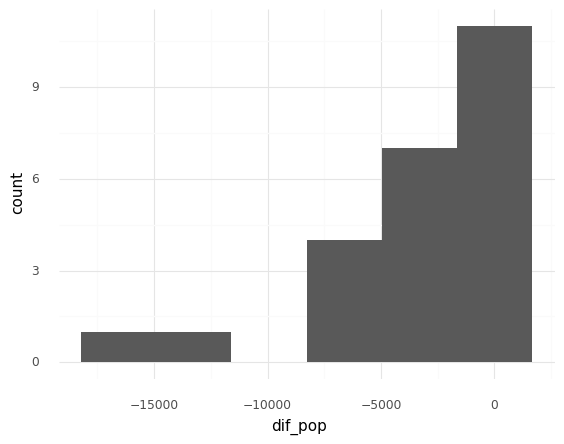

<ggplot: (799988685)>

In [204]:
(
        ggplot(piv_ca1.query("dif_pop <0")) +
            aes(x='dif_pop') +
            geom_histogram() +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() 
#             facet_wrap("dif_pop > 0", scales="free") 
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
#             labs(
#                 title = "CA Incarcerated Persons per Census Block — Original vs. Adjusted",
#                 y = "Adjusted Population",
#                 x = "U.S. Census Population"
#             )
#             + theme(figure_size=(10, 5)) 
    )

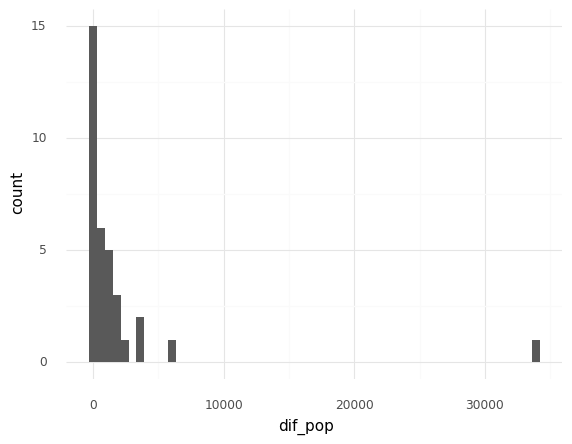

<ggplot: (792906167)>

In [205]:
(
        ggplot(piv_ca1.query("dif_pop >0")) +
            aes(x='dif_pop') +
            geom_histogram() +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() 
#             facet_wrap("dif_pop > 0", scales="free") 
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
#             labs(
#                 title = "CA Incarcerated Persons per Census Block — Original vs. Adjusted",
#                 y = "Adjusted Population",
#                 x = "U.S. Census Population"
#             )
#             + theme(figure_size=(10, 5)) 
    )

In [206]:
# piv_ca8.query("adj_pop <0").dif_pop.plot(kind = "hist", figsize = (10,10))

<AxesSubplot:ylabel='Frequency'>

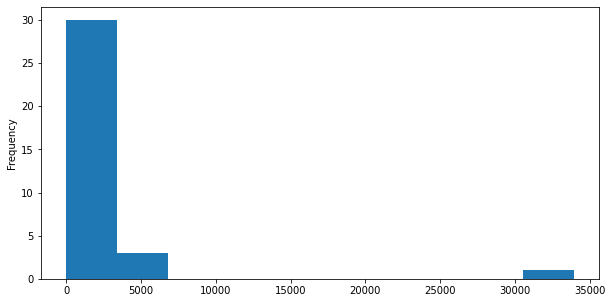

In [207]:
piv_ca1.query("dif_pop >0").dif_pop.plot(kind = "hist", figsize = (10,5))

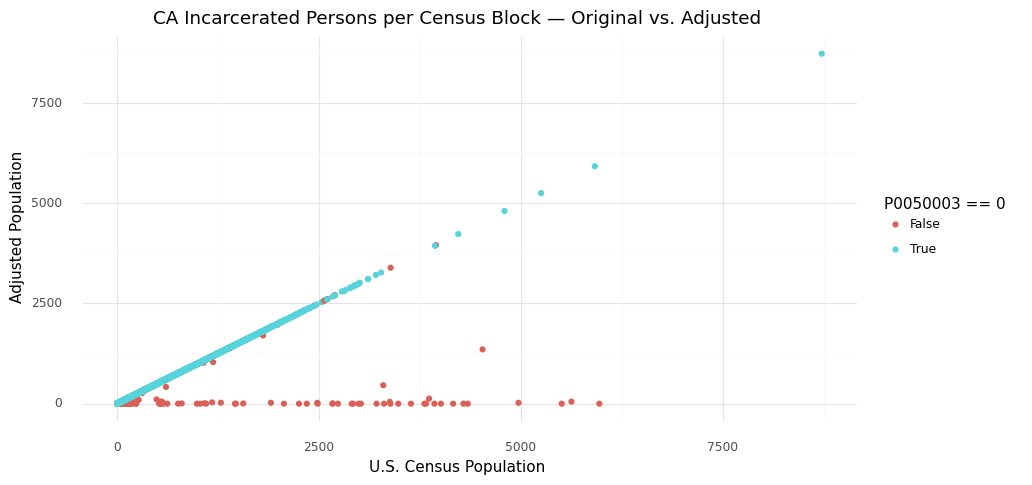

<ggplot: (794376808)>

In [208]:
(
        ggplot(df_ca) +
            aes(x='P0020001', y='Population P2', color = 'P0050003 == 0') +
            geom_point() +
#             geom_smooth() +
#             geom_segment(mapping = aes(col = "distance"))+
            theme_minimal() +
#             facet_wrap("~school_to_school") +
#             scale_y_continuous(limits = (0, 100),
#                 expand = (0, 0),
#                 breaks = (0, 10, 20, 30, 40, 50 , 60, 70, 80, 90, 100)
#             ) +
#             scale_x_continuous(limits = (0, 30),
#                 expand = (0, 0),
#                 breaks = (0, 5, 10, 15, 20, 25, 30)
#             ) +
            labs(
                title = "CA Incarcerated Persons per Census Block — Original vs. Adjusted",
                y = "Adjusted Population",
                x = "U.S. Census Population"
            )
            + theme(figure_size=(10, 5)) 
    )

In [209]:
df_ca.query("0 < P0050003 < 500")

BLOCK20  COUNTY   TRACT  BLOCK  P0020001  Population P2  \
823     60014016002000       1  401600   2000       231            231   
1251    60014028012000       1  402801   2000       986            986   
1262    60014028021005       1  402802   1005       151            151   
2859    60014062014001       1  406201   4001       143            145   
9715    60014340003003       1  434000   3003        28              0   
...                ...     ...     ...    ...       ...            ...   
506383  61110015102001     111    1510   2001       420            423   
512164  61110075131001     111    7513   1001       266             96   
514202  61110093002111     111    9300   2111       285            273   
516849  61130112082000     113   11208   2000       217            218   
518048  61150401005057     115   40100   5057       368            369   

        P0030001  18+_Population P4  P0050003  GQ_Inst_CFAdult  P0050004  \
823          184                184        23               23         0   
1251         905                905        78               78         0   
1262         148                148        78               78         0   
2859         119                121        41               41         0   
9715          28                  0        28                0         0   
...          ...                ...       ...              ...       ...   
506383       410                413       402              402         0   
512164       257                 87       170                0         0   
514202       227                215        12                0       252   
516849       215                216       213              213         4   
518048       367                368       368              368         0   

        GQ_Inst_Juvenile  AREALAND        NAME   INTPTLAT    INTPTLON  \
823                    0     24043  Block 2000  37.815759 -122.276721   
1251                   0     29119  Block 2000  37.811034 -122.271388   
1262                   0      9727  Block 1005  37.806515 -122.273568   
2859                   0      6953  Block 4001  37.784164 -122.234076   
9715                   0      2630  Block 3003  37.695395 -122.114491   
...                  ...       ...         ...        ...         ...   
506383                 0    340622  Block 2001  34.268520 -119.209907   
512164                 0    356054  Block 1001  34.260856 -118.793624   
514202               252   2890794  Block 2111  34.240850 -119.112783   
516849                 4   1024911  Block 2000  38.658822 -121.735514   
518048                 0     15905  Block 5057  39.141077 -121.586835   

        dif_pop  adjpop  
823           0     231  
1251          0     986  
1262          0     151  
2859          2     145  
9715        -28       0  
...         ...     ...  
506383        3     423  
512164     -170      96  
514202      -12     273  
516849        1     218  
518048        1     369  

[206 rows x 18 columns]